In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#CTDC

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_CTDC.csv')
data.tail()

,#,hydrophobicity_PRAM900101.G1,hydrophobicity_PRAM900101.G2,hydrophobicity_PRAM900101.G3,hydrophobicity_ARGP820101.G1,hydrophobicity_ARGP820101.G2,hydrophobicity_ARGP820101.G3,hydrophobicity_ZIMJ680101.G1,hydrophobicity_ZIMJ680101.G2,hydrophobicity_ZIMJ680101.G3,hydrophobicity_PONP930101.G1,hydrophobicity_PONP930101.G2,hydrophobicity_PONP930101.G3,hydrophobicity_CASG920101.G1,hydrophobicity_CASG920101.G2,hydrophobicity_CASG920101.G3,hydrophobicity_ENGD860101.G1,hydrophobicity_ENGD860101.G2,hydrophobicity_ENGD860101.G3,hydrophobicity_FASG890101.G1,hydrophobicity_FASG890101.G2,hydrophobicity_FASG890101.G3,normwaalsvolume.G1,normwaalsvolume.G2,normwaalsvolume.G3,polarity.G1,polarity.G2,polarity.G3,polarizability.G1,polarizability.G2,polarizability.G3,charge.G1,charge.G2,charge.G3,secondarystruct.G1,secondarystruct.G2,secondarystruct.G3,solventaccess.G1,solventaccess.G2,solventaccess.G3
14318,d3s2ra|g,0.375000,0.296875,0.328125,0.406250,0.359375,0.234375,0.484375,0.296875,0.218750,0.500000,0.156250,0.343750,0.625000,0.234375,0.140625,0.468750,0.218750,0.312500,0.343750,0.281250,0.375000,0.390625,0.390625,0.218750,0.343750,0.265625,0.390625,0.265625,0.515625,0.218750,0.156250,0.734375,0.109375,0.328125,0.312500,0.359375,0.421875,0.375000,0.203125
14319,d4c3hd|g,0.314607,0.404494,0.280899,0.505618,0.247191,0.247191,0.629213,0.123596,0.247191,0.550562,0.168539,0.280899,0.595506,0.280899,0.123596,0.370787,0.348315,0.280899,0.348315,0.247191,0.404494,0.460674,0.415730,0.123596,0.280899,0.382022,0.337079,0.426966,0.449438,0.123596,0.056180,0.820225,0.123596,0.382022,0.292135,0.325843,0.393258,0.314607,0.292135
14320,d3jb9e|g,0.381944,0.326389,0.291667,0.375000,0.347222,0.277778,0.520833,0.215278,0.263889,0.451389,0.208333,0.340278,0.597222,0.229167,0.173611,0.493056,0.229167,0.277778,0.395833,0.201389,0.402778,0.381944,0.305556,0.312500,0.340278,0.256944,0.402778,0.270833,0.416667,0.312500,0.180556,0.701389,0.118056,0.458333,0.305556,0.236111,0.368056,0.381944,0.250000
14321,d5lj3n2|g,0.374101,0.258993,0.366906,0.388489,0.323741,0.287770,0.482014,0.237410,0.280576,0.489209,0.136691,0.374101,0.568345,0.237410,0.194245,0.453237,0.187050,0.359712,0.345324,0.223022,0.431655,0.345324,0.431655,0.223022,0.374101,0.230216,0.395683,0.230216,0.546763,0.223022,0.129496,0.755396,0.115108,0.431655,0.294964,0.273381,0.395683,0.374101,0.230216
14322,d5syba|g,0.322222,0.333333,0.344444,0.344444,0.422222,0.233333,0.455556,0.311111,0.233333,0.366667,0.233333,0.400000,0.533333,0.244444,0.222222,0.444444,0.211111,0.344444,0.344444,0.188889,0.466667,0.466667,0.300000,0.233333,0.400000,0.255556,0.344444,0.288889,0.477778,0.233333,0.144444,0.733333,0.122222,0.333333,0.377778,0.288889,0.488889,0.322222,0.188889


In [ ]:
data[['d1','class']]=data.iloc[:,0].str.split('|', n=1, expand=True)
data = data.drop(data.columns[[0]],axis = 1)
data=data.drop(['d1'], axis=1)
data.tail()

,hydrophobicity_PRAM900101.G1,hydrophobicity_PRAM900101.G2,hydrophobicity_PRAM900101.G3,hydrophobicity_ARGP820101.G1,hydrophobicity_ARGP820101.G2,hydrophobicity_ARGP820101.G3,hydrophobicity_ZIMJ680101.G1,hydrophobicity_ZIMJ680101.G2,hydrophobicity_ZIMJ680101.G3,hydrophobicity_PONP930101.G1,hydrophobicity_PONP930101.G2,hydrophobicity_PONP930101.G3,hydrophobicity_CASG920101.G1,hydrophobicity_CASG920101.G2,hydrophobicity_CASG920101.G3,hydrophobicity_ENGD860101.G1,hydrophobicity_ENGD860101.G2,hydrophobicity_ENGD860101.G3,hydrophobicity_FASG890101.G1,hydrophobicity_FASG890101.G2,hydrophobicity_FASG890101.G3,normwaalsvolume.G1,normwaalsvolume.G2,normwaalsvolume.G3,polarity.G1,polarity.G2,polarity.G3,polarizability.G1,polarizability.G2,polarizability.G3,charge.G1,charge.G2,charge.G3,secondarystruct.G1,secondarystruct.G2,secondarystruct.G3,solventaccess.G1,solventaccess.G2,solventaccess.G3,class
14318,0.375000,0.296875,0.328125,0.406250,0.359375,0.234375,0.484375,0.296875,0.218750,0.500000,0.156250,0.343750,0.625000,0.234375,0.140625,0.468750,0.218750,0.312500,0.343750,0.281250,0.375000,0.390625,0.390625,0.218750,0.343750,0.265625,0.390625,0.265625,0.515625,0.218750,0.156250,0.734375,0.109375,0.328125,0.312500,0.359375,0.421875,0.375000,0.203125,g
14319,0.314607,0.404494,0.280899,0.505618,0.247191,0.247191,0.629213,0.123596,0.247191,0.550562,0.168539,0.280899,0.595506,0.280899,0.123596,0.370787,0.348315,0.280899,0.348315,0.247191,0.404494,0.460674,0.415730,0.123596,0.280899,0.382022,0.337079,0.426966,0.449438,0.123596,0.056180,0.820225,0.123596,0.382022,0.292135,0.325843,0.393258,0.314607,0.292135,g
14320,0.381944,0.326389,0.291667,0.375000,0.347222,0.277778,0.520833,0.215278,0.263889,0.451389,0.208333,0.340278,0.597222,0.229167,0.173611,0.493056,0.229167,0.277778,0.395833,0.201389,0.402778,0.381944,0.305556,0.312500,0.340278,0.256944,0.402778,0.270833,0.416667,0.312500,0.180556,0.701389,0.118056,0.458333,0.305556,0.236111,0.368056,0.381944,0.250000,g
14321,0.374101,0.258993,0.366906,0.388489,0.323741,0.287770,0.482014,0.237410,0.280576,0.489209,0.136691,0.374101,0.568345,0.237410,0.194245,0.453237,0.187050,0.359712,0.345324,0.223022,0.431655,0.345324,0.431655,0.223022,0.374101,0.230216,0.395683,0.230216,0.546763,0.223022,0.129496,0.755396,0.115108,0.431655,0.294964,0.273381,0.395683,0.374101,0.230216,g
14322,0.322222,0.333333,0.344444,0.344444,0.422222,0.233333,0.455556,0.311111,0.233333,0.366667,0.233333,0.400000,0.533333,0.244444,0.222222,0.444444,0.211111,0.344444,0.344444,0.188889,0.466667,0.466667,0.300000,0.233333,0.400000,0.255556,0.344444,0.288889,0.477778,0.233333,0.144444,0.733333,0.122222,0.333333,0.377778,0.288889,0.488889,0.322222,0.188889,g


In [ ]:
X= data.iloc[:,:-1].values
y= data.iloc[:,-1].values

print(X)
print(y)

[[0.24137931 0.45689655 0.30172414 ... 0.56896552 0.24137931 0.18965517]
 [0.23622047 0.43307087 0.33070866 ... 0.51968504 0.23622047 0.24409449]
 [0.34126984 0.37301587 0.28571429 ... 0.4047619  0.34126984 0.25396825]
 ...
 [0.38194444 0.32638889 0.29166667 ... 0.36805556 0.38194444 0.25      ]
 [0.37410072 0.25899281 0.36690647 ... 0.39568345 0.37410072 0.23021583]
 [0.32222222 0.33333333 0.34444444 ... 0.48888889 0.32222222 0.18888889]]
['a' 'a' 'a' ... 'g' 'g' 'g']


In [ ]:
le = LabelEncoder()
y= le.fit_transform(y) 
print(y)

[0 0 0 ... 6 6 6]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size = 0.30, random_state = 5)

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
print("\nRecall:",recall_score(y_test, y_pred, average=None))
print("\n\nF1 score:",f1_score(y_test, y_pred, average=None))

Confusion matrix: 
 [[444  33 181 113   0   1   3]
 [ 31 488 195 146   0   0   5]
 [ 71  90 956 121   0   0   1]
 [153 160 463 249   0   0   8]
 [ 10   8  56   9   0   0   0]
 [  7  13  16   4   0  43   0]
 [ 12  22   4  13   0   1 167]]


Accuracy: 0.5461950197812427


Precision: [0.60989011 0.5995086  0.51095671 0.38015267 0.         0.95555556
 0.9076087 ]

Recall: [0.57290323 0.56416185 0.77158999 0.2410455  0.         0.51807229
 0.76255708]


F1 score: [0.59081836 0.58129839 0.614791   0.2950237  0.         0.671875
 0.82878412]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                              hydrophobicity_PRAM900101.G1  ...  solventaccess.G3
hydrophobicity_PRAM900101.G1                      1.000000  ...         -0.450307
hydrophobicity_PRAM900101.G2                     -0.770310  ...          0.569522
hydrophobicity_PRAM900101.G3                     -0.190849  ...         -0.256797
hydrophobicity_ARGP820101.G1                      0.134596  ...          0.234890
hydrophobicity_ARGP820101.G2                      0.004604  ...         -0.299573

[5 rows x 39 columns]


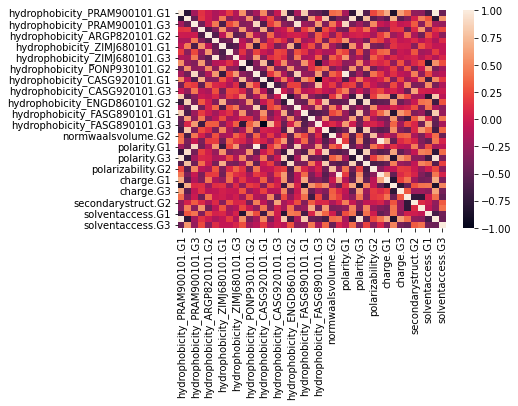

In [ ]:
new_dataset = pd.DataFrame(X, columns=data.columns[0:-1])
corr = new_dataset.corr()
print(corr.head())
sb.heatmap(corr)

In [ ]:
columns = np.full((len(new_dataset.columns),), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = new_dataset.columns[columns]
selected_columns.shape
print("Selected Columns :- \n\n",selected_columns)

new_dataset = new_dataset[selected_columns]
print("\n\nNew Data :- \n\n",new_dataset)



Selected Columns :- 

 Index(['hydrophobicity_PRAM900101.G1', 'hydrophobicity_PRAM900101.G2',
       'hydrophobicity_PRAM900101.G3', 'hydrophobicity_ARGP820101.G1',
       'hydrophobicity_ARGP820101.G2', 'hydrophobicity_ARGP820101.G3',
       'hydrophobicity_ZIMJ680101.G1', 'hydrophobicity_ZIMJ680101.G2',
       'hydrophobicity_PONP930101.G1', 'hydrophobicity_PONP930101.G2',
       'hydrophobicity_PONP930101.G3', 'hydrophobicity_CASG920101.G1',
       'hydrophobicity_CASG920101.G2', 'hydrophobicity_CASG920101.G3',
       'hydrophobicity_ENGD860101.G1', 'hydrophobicity_ENGD860101.G2',
       'hydrophobicity_FASG890101.G1', 'hydrophobicity_FASG890101.G2',
       'hydrophobicity_FASG890101.G3', 'normwaalsvolume.G1',
       'normwaalsvolume.G2', 'normwaalsvolume.G3', 'polarizability.G2',
       'charge.G1', 'charge.G2', 'charge.G3', 'secondarystruct.G1',
       'secondarystruct.G2', 'secondarystruct.G3', 'solventaccess.G1',
       'solventaccess.G3'],
      dtype='object')


New Data :- 



In [ ]:
X=new_dataset.iloc[:,:].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size = 0.30, random_state = 5)

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:

print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
print("\nRecall:",recall_score(y_test, y_pred, average=None))
print("\n\nF1 score:",f1_score(y_test, y_pred, average=None))

Confusion matrix: 
 [[443  28 185 115   0   1   3]
 [ 35 480 202 142   0   1   5]
 [ 69  96 951 122   0   0   1]
 [162 162 451 251   0   0   7]
 [  9   7  56  11   0   0   0]
 [  7  13  16   4   0  43   0]
 [ 14  20   5  15   0   1 164]]


Accuracy: 0.5427042122410984


Precision: [0.59945873 0.5955335  0.5096463  0.38030303 0.         0.93478261
 0.91111111]

Recall: [0.5716129  0.55491329 0.76755448 0.24298161 0.         0.51807229
 0.74885845]


F1 score: [0.58520476 0.57450628 0.61256039 0.29651506 0.         0.66666667
 0.82205514]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# C_triad

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_CTriad.csv')
data.tail()

,#,g1.g1.g1,g1.g1.g2,g1.g1.g3,g1.g1.g4,g1.g1.g5,g1.g1.g6,g1.g1.g7,g1.g2.g1,g1.g2.g2,g1.g2.g3,g1.g2.g4,g1.g2.g5,g1.g2.g6,g1.g2.g7,g1.g3.g1,g1.g3.g2,g1.g3.g3,g1.g3.g4,g1.g3.g5,g1.g3.g6,g1.g3.g7,g1.g4.g1,g1.g4.g2,g1.g4.g3,g1.g4.g4,g1.g4.g5,g1.g4.g6,g1.g4.g7,g1.g5.g1,g1.g5.g2,g1.g5.g3,g1.g5.g4,g1.g5.g5,g1.g5.g6,g1.g5.g7,g1.g6.g1,g1.g6.g2,g1.g6.g3,g1.g6.g4,...,g7.g2.g3,g7.g2.g4,g7.g2.g5,g7.g2.g6,g7.g2.g7,g7.g3.g1,g7.g3.g2,g7.g3.g3,g7.g3.g4,g7.g3.g5,g7.g3.g6,g7.g3.g7,g7.g4.g1,g7.g4.g2,g7.g4.g3,g7.g4.g4,g7.g4.g5,g7.g4.g6,g7.g4.g7,g7.g5.g1,g7.g5.g2,g7.g5.g3,g7.g5.g4,g7.g5.g5,g7.g5.g6,g7.g5.g7,g7.g6.g1,g7.g6.g2,g7.g6.g3,g7.g6.g4,g7.g6.g5,g7.g6.g6,g7.g6.g7,g7.g7.g1,g7.g7.g2,g7.g7.g3,g7.g7.g4,g7.g7.g5,g7.g7.g6,g7.g7.g7
14318,d3s2ra|g,0.333333,0.333333,0.333333,0.000000,0.0,0.333333,0.0,0.000000,0.333333,0.00,0.333333,0.00,0.00,0.000000,0.0,0.333333,0.000000,0.000000,0.00,0.333333,0.333333,0.333333,0.000000,0.000000,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.333333,0.0,0.0,0.000000,0.000000,0.0,0.333333,0.333333,...,0.0,0.00,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.333333,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.000000,0.333333,0.333333,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
14319,d4c3hd|g,1.000000,0.333333,0.000000,0.333333,0.0,0.333333,0.0,0.000000,0.333333,0.00,0.666667,0.00,0.00,0.000000,0.0,0.000000,0.666667,0.333333,0.00,0.000000,0.000000,0.333333,0.000000,0.333333,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,0.000000,0.666667,0.0,0.000000,0.000000,...,0.0,0.00,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
14320,d3jb9e|g,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.250000,0.25,0.000000,0.25,0.25,0.000000,0.0,0.000000,0.250000,0.000000,0.25,0.250000,0.250000,0.000000,0.250000,0.000000,0.0,0.0,0.00,0.0,0.25,0.00,0.0,0.250000,0.0,0.0,0.250000,0.250000,0.0,0.250000,0.000000,...,0.0,0.25,0.250000,0.0,0.25,0.0,0.000000,0.0,0.25,0.0,0.0,0.0,0.25,0.0,0.000000,0.0,0.000000,0.0,0.00,0.25,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.25,0.00,0.0,0.0,0.0,0.0
14321,d5lj3n2|g,0.250000,0.000000,0.000000,0.250000,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.250000,0.250000,0.00,0.250000,0.000000,0.000000,0.500000,0.000000,0.0,0.0,0.25,0.0,0.00,0.25,0.0,0.250000,0.0,0.0,0.250000,0.000000,0.0,0.000000,0.250000,...,0.0,0.00,0.000000,0.0,0.00,0.0,0.500000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.25,0.00,0.25,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.25,0.000000,0.000000,0.0,0.0,0.00,0.25,0.0,0.0,0.0,0.0
14322,d5syba|g,0.666667,0.666667,0.333333,0.000000,0.0,0.000000,0.0,0.666667,0.000000,0.00,0.000000,0.00,0.00,0.666667,0.0,0.000000,0.666667,0.000000,0.00,0.333333,0.000000,0.000000,0.333333,0.000000,0.0,0.0,0.00,0.0,0.00,1.00,0.0,0.333333,0.0,0.0,0.666667,0.000000,0.0,0.000000,0.000000,...,0.0,0.00,0.333333,0.0,0.00,0.0,0.333333,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.333333,0.0,0.000000,0.0,0.00,0.00,0.00,0.0,0.0,0.333333,0.333333,0.000000,0.333333,0.0,0.333333,0.00,0.333333,0.333333,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0


In [ ]:
data[['d1','class']]=data.iloc[:,0].str.split('|', n=1, expand=True)
data = data.drop(data.columns[[0]],axis = 1)
data=data.drop(['d1'], axis=1)
data.tail()

,g1.g1.g1,g1.g1.g2,g1.g1.g3,g1.g1.g4,g1.g1.g5,g1.g1.g6,g1.g1.g7,g1.g2.g1,g1.g2.g2,g1.g2.g3,g1.g2.g4,g1.g2.g5,g1.g2.g6,g1.g2.g7,g1.g3.g1,g1.g3.g2,g1.g3.g3,g1.g3.g4,g1.g3.g5,g1.g3.g6,g1.g3.g7,g1.g4.g1,g1.g4.g2,g1.g4.g3,g1.g4.g4,g1.g4.g5,g1.g4.g6,g1.g4.g7,g1.g5.g1,g1.g5.g2,g1.g5.g3,g1.g5.g4,g1.g5.g5,g1.g5.g6,g1.g5.g7,g1.g6.g1,g1.g6.g2,g1.g6.g3,g1.g6.g4,g1.g6.g5,...,g7.g2.g4,g7.g2.g5,g7.g2.g6,g7.g2.g7,g7.g3.g1,g7.g3.g2,g7.g3.g3,g7.g3.g4,g7.g3.g5,g7.g3.g6,g7.g3.g7,g7.g4.g1,g7.g4.g2,g7.g4.g3,g7.g4.g4,g7.g4.g5,g7.g4.g6,g7.g4.g7,g7.g5.g1,g7.g5.g2,g7.g5.g3,g7.g5.g4,g7.g5.g5,g7.g5.g6,g7.g5.g7,g7.g6.g1,g7.g6.g2,g7.g6.g3,g7.g6.g4,g7.g6.g5,g7.g6.g6,g7.g6.g7,g7.g7.g1,g7.g7.g2,g7.g7.g3,g7.g7.g4,g7.g7.g5,g7.g7.g6,g7.g7.g7,class
14318,0.333333,0.333333,0.333333,0.000000,0.0,0.333333,0.0,0.000000,0.333333,0.00,0.333333,0.00,0.00,0.000000,0.0,0.333333,0.000000,0.000000,0.00,0.333333,0.333333,0.333333,0.000000,0.000000,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.333333,0.0,0.0,0.000000,0.000000,0.0,0.333333,0.333333,0.00,...,0.00,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.333333,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.000000,0.333333,0.333333,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,g
14319,1.000000,0.333333,0.000000,0.333333,0.0,0.333333,0.0,0.000000,0.333333,0.00,0.666667,0.00,0.00,0.000000,0.0,0.000000,0.666667,0.333333,0.00,0.000000,0.000000,0.333333,0.000000,0.333333,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,0.000000,0.666667,0.0,0.000000,0.000000,0.00,...,0.00,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,g
14320,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.250000,0.25,0.000000,0.25,0.25,0.000000,0.0,0.000000,0.250000,0.000000,0.25,0.250000,0.250000,0.000000,0.250000,0.000000,0.0,0.0,0.00,0.0,0.25,0.00,0.0,0.250000,0.0,0.0,0.250000,0.250000,0.0,0.250000,0.000000,0.00,...,0.25,0.250000,0.0,0.25,0.0,0.000000,0.0,0.25,0.0,0.0,0.0,0.25,0.0,0.000000,0.0,0.000000,0.0,0.00,0.25,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.25,0.00,0.0,0.0,0.0,0.0,g
14321,0.250000,0.000000,0.000000,0.250000,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.250000,0.250000,0.00,0.250000,0.000000,0.000000,0.500000,0.000000,0.0,0.0,0.25,0.0,0.00,0.25,0.0,0.250000,0.0,0.0,0.250000,0.000000,0.0,0.000000,0.250000,0.25,...,0.00,0.000000,0.0,0.00,0.0,0.500000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.25,0.00,0.25,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.25,0.000000,0.000000,0.0,0.0,0.00,0.25,0.0,0.0,0.0,0.0,g
14322,0.666667,0.666667,0.333333,0.000000,0.0,0.000000,0.0,0.666667,0.000000,0.00,0.000000,0.00,0.00,0.666667,0.0,0.000000,0.666667,0.000000,0.00,0.333333,0.000000,0.000000,0.333333,0.000000,0.0,0.0,0.00,0.0,0.00,1.00,0.0,0.333333,0.0,0.0,0.666667,0.000000,0.0,0.000000,0.000000,0.00,...,0.00,0.333333,0.0,0.00,0.0,0.333333,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.333333,0.0,0.000000,0.0,0.00,0.00,0.00,0.0,0.0,0.333333,0.333333,0.000000,0.333333,0.0,0.333333,0.00,0.333333,0.333333,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,g


In [ ]:
X= data.iloc[:,:-1].values
y= data.iloc[:,-1].values

print(X)
print(y)

[[1.         0.5        0.5        ... 0.         0.         0.        ]
 [0.83333333 0.83333333 0.         ... 0.         0.         0.        ]
 [1.         0.2        0.2        ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.25       0.         0.         ... 0.         0.         0.        ]
 [0.66666667 0.66666667 0.33333333 ... 0.         0.         0.        ]]
['a' 'a' 'a' ... 'g' 'g' 'g']


In [ ]:
le = LabelEncoder()
y= le.fit_transform(y) 
print(y)

[0 0 0 ... 6 6 6]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size = 0.30, random_state = 5)


In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
print("\nRecall:",recall_score(y_test, y_pred, average=None))
print("\n\nF1 score:",f1_score(y_test, y_pred, average=None))

Confusion matrix: 
 [[ 285   86  195  200    0    0    9]
 [  53  416  172  213    0    0   11]
 [  36   60 1001  141    0    0    1]
 [ 167  192  352  315    0    1    6]
 [   3    2   75    3    0    0    0]
 [   5   16   31    7    0   22    2]
 [  20   24    1   10    0    0  164]]


Accuracy: 0.5126832673958576


Precision: [0.50087873 0.52261307 0.54789272 0.35433071 0.         0.95652174
 0.84974093]

Recall: [0.36774194 0.48092486 0.8079096  0.30493708 0.         0.26506024
 0.74885845]


F1 score: [0.42410714 0.50090307 0.65296804 0.32778356 0.         0.41509434
 0.7961165 ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


          g1.g1.g1  g1.g1.g2  g1.g1.g3  ...  g7.g7.g5  g7.g7.g6  g7.g7.g7
g1.g1.g1  1.000000  0.357802  0.322332  ... -0.038796 -0.036096 -0.011546
g1.g1.g2  0.357802  1.000000  0.157739  ... -0.037650 -0.015363 -0.012789
g1.g1.g3  0.322332  0.157739  1.000000  ... -0.022856 -0.030550 -0.012603
g1.g1.g4  0.249233  0.122485  0.132902  ... -0.000520 -0.022794 -0.010562
g1.g1.g5  0.250684  0.124261  0.099952  ... -0.032314 -0.027778 -0.007300

[5 rows x 343 columns]


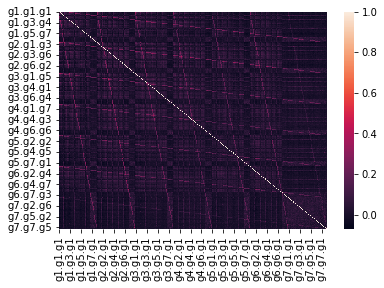

In [ ]:
new_dataset = pd.DataFrame(X, columns=data.columns[0:-1])
corr = new_dataset.corr()
print(corr.head())
sb.heatmap(corr)

# GAAC

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_GAAC.csv')
data.tail()

data[['d1','class']]=data.iloc[:,0].str.split('|', n=1, expand=True)
data = data.drop(data.columns[[0]],axis = 1)
data=data.drop(['d1'], axis=1)
data.tail()

X= data.iloc[:,:-1].values
y= data.iloc[:,-1].values

print(X)
print(y)

le = LabelEncoder()
y= le.fit_transform(y) 
print(y)

X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size = 0.30, random_state = 5)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
print("\nRecall:",recall_score(y_test, y_pred, average=None))
print("\n\nF1 score:",f1_score(y_test, y_pred, average=None))

[[0.51724138 0.06896552 0.06034483 0.06034483 0.29310345]
 [0.48818898 0.07086614 0.12598425 0.11023622 0.20472441]
 [0.36507937 0.11111111 0.17460317 0.17460317 0.17460317]
 ...
 [0.27777778 0.09027778 0.20138889 0.11805556 0.3125    ]
 [0.3381295  0.03597122 0.15107914 0.11510791 0.35971223]
 [0.34444444 0.06666667 0.16666667 0.12222222 0.3       ]]
['a' 'a' 'a' ... 'g' 'g' 'g']
[0 0 0 ... 6 6 6]
Confusion matrix: 
 [[160  96 292 213   0   0  14]
 [ 56 337 280 160   0   4  28]
 [ 29  84 962 163   0   0   1]
 [ 99 173 507 240   0   0  14]
 [  3  10  58  11   0   0   1]
 [  5  10  20   5   0  43   0]
 [ 17  52   4  13   0   0 133]]


Accuracy: 0.43635094251803586


Precision: [0.43360434 0.44225722 0.45313236 0.29813665 0.         0.91489362
 0.69633508]

Recall: [0.20645161 0.38959538 0.77643261 0.23233301 0.         0.51807229
 0.60730594]


F1 score: [0.27972028 0.41425937 0.57227841 0.26115343 0.         0.66153846
 0.64878049]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
data.tail()

,alphatic,aromatic,postivecharge,negativecharge,uncharge,class
14318,0.328125,0.046875,0.171875,0.109375,0.343750,g
14319,0.370787,0.033708,0.078652,0.123596,0.393258,g
14320,0.277778,0.090278,0.201389,0.118056,0.312500,g
14321,0.338129,0.035971,0.151079,0.115108,0.359712,g
14322,0.344444,0.066667,0.166667,0.122222,0.300000,g


                alphatic  aromatic  postivecharge  negativecharge  uncharge
alphatic        1.000000 -0.454423      -0.342771       -0.137046 -0.545194
aromatic       -0.454423  1.000000      -0.045019       -0.051028  0.036977
postivecharge  -0.342771 -0.045019       1.000000        0.151223 -0.303897
negativecharge -0.137046 -0.051028       0.151223        1.000000 -0.472508
uncharge       -0.545194  0.036977      -0.303897       -0.472508  1.000000


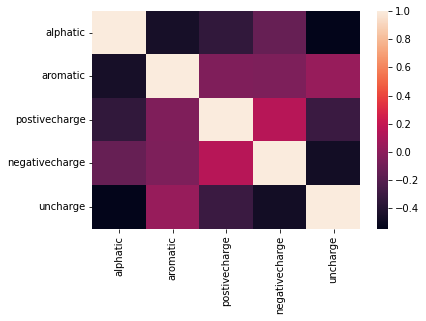

In [ ]:
new_dataset = pd.DataFrame(X, columns=data.columns[0:-1])
corr = new_dataset.corr()
print(corr.head())
sb.heatmap(corr)


#CTDT

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_CTDT.csv')
data.tail()

data[['d1','class']]=data.iloc[:,0].str.split('|', n=1, expand=True)
data = data.drop(data.columns[[0]],axis = 1)
data=data.drop(['d1'], axis=1)
data.tail()

X= data.iloc[:,:-1].values
y= data.iloc[:,-1].values

print(X)
print(y)

le = LabelEncoder()
y= le.fit_transform(y) 
print(y)

X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size = 0.30, random_state = 5)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
print("\nRecall:",recall_score(y_test, y_pred, average=None))
print("\n\nF1 score:",f1_score(y_test, y_pred, average=None))

[[0.22608696 0.15652174 0.32173913 ... 0.28695652 0.24347826 0.09565217]
 [0.16666667 0.16666667 0.32539683 ... 0.22222222 0.23015873 0.11111111]
 [0.208      0.216      0.208      ... 0.248      0.208      0.176     ]
 ...
 [0.26573427 0.25174825 0.16783217 ... 0.3006993  0.16083916 0.21678322]
 [0.19565217 0.27536232 0.18115942 ... 0.31884058 0.18115942 0.15217391]
 [0.19101124 0.23595506 0.15730337 ... 0.33707865 0.13483146 0.08988764]]
['a' 'a' 'a' ... 'g' 'g' 'g']
[0 0 0 ... 6 6 6]
Confusion matrix: 
 [[348  66 213 143   0   2   3]
 [ 52 476 162 167   0   1   7]
 [ 69  80 964 123   0   0   3]
 [158 181 424 258   0   1  11]
 [  5  10  57  11   0   0   0]
 [  6   8  16  12   0  41   0]
 [ 18  25   3  16   0   2 155]]


Accuracy: 0.5217593670002327


Precision: [0.5304878  0.56264775 0.52419793 0.35342466 0.         0.87234043
 0.86592179]

Recall: [0.44903226 0.55028902 0.77804681 0.24975799 0.         0.4939759
 0.70776256]


F1 score: [0.48637317 0.55639977 0.62638077 0.29268293 0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#AAC

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_AAC.csv')
data.tail()

data[['d1','class']]=data.iloc[:,0].str.split('|', n=1, expand=True)
data = data.drop(data.columns[[0]],axis = 1)
data=data.drop(['d1'], axis=1)
data.tail()

X= data.iloc[:,:-1].values
y= data.iloc[:,-1].values

print(X)
print(y)

le = LabelEncoder()
y= le.fit_transform(y) 
print(y)

X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size = 0.30, random_state = 5)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
print("\nRecall:",recall_score(y_test, y_pred, average=None))
print("\n\nF1 score:",f1_score(y_test, y_pred, average=None))

[[0.18965517 0.00862069 0.02586207 ... 0.12068966 0.00862069 0.00862069]
 [0.11023622 0.         0.04724409 ... 0.09448819 0.         0.01574803]
 [0.1031746  0.00793651 0.07936508 ... 0.05555556 0.01587302 0.04761905]
 ...
 [0.04166667 0.06944444 0.05555556 ... 0.01388889 0.01388889 0.04861111]
 [0.03597122 0.0647482  0.05035971 ... 0.03597122 0.00719424 0.00719424]
 [0.04444444 0.13333333 0.07777778 ... 0.07777778 0.         0.05555556]]
['a' 'a' 'a' ... 'g' 'g' 'g']
[0 0 0 ... 6 6 6]
Confusion matrix: 
 [[449  33 148 132   0   2  11]
 [ 40 503 150 158   0   4  10]
 [ 65  77 957 139   0   0   1]
 [136 185 390 304   0   1  17]
 [  5   6  68   4   0   0   0]
 [ 11  13  15   9   0  35   0]
 [  9  10   0   8   0   0 192]]


Accuracy: 0.5678380265301373


Precision: [0.62797203 0.60822249 0.55381944 0.40318302 0.         0.83333333
 0.83116883]

Recall: [0.57935484 0.58150289 0.77239709 0.29428848 0.         0.42168675
 0.87671233]


F1 score: [0.60268456 0.59456265 0.64509606 0.34023503 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


          A         C         D  ...         V         W         Y
A  1.000000 -0.193020 -0.050675  ...  0.074433 -0.051106 -0.248275
C -0.193020  1.000000 -0.096767  ... -0.221769  0.028809  0.000546
D -0.050675 -0.096767  1.000000  ... -0.021495 -0.004687  0.021245
E -0.131445 -0.130778 -0.101939  ... -0.023397 -0.100792 -0.055113
F -0.187293 -0.079412  0.022773  ... -0.124911  0.002037  0.090320

[5 rows x 20 columns]


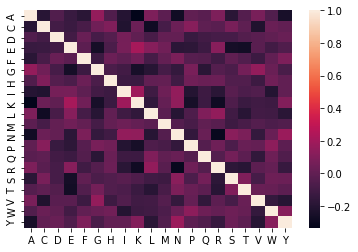

In [ ]:
new_dataset = pd.DataFrame(X, columns=data.columns[0:-1])
corr = new_dataset.corr()
print(corr.head())
sb.heatmap(corr)

#Combined features

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_AAC.csv')
df1 = df1.drop(df1.columns[[0]],axis = 1)
df1.tail()

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
14318,0.015625,0.062500,0.062500,0.046875,0.015625,0.078125,0.015625,0.046875,0.109375,0.078125,0.000000,0.093750,0.062500,0.015625,0.046875,0.062500,0.046875,0.109375,0.015625,0.015625
14319,0.101124,0.000000,0.078652,0.044944,0.033708,0.022472,0.022472,0.089888,0.033708,0.089888,0.011236,0.078652,0.033708,0.056180,0.022472,0.112360,0.112360,0.056180,0.000000,0.000000
14320,0.041667,0.069444,0.055556,0.062500,0.027778,0.055556,0.020833,0.062500,0.090278,0.083333,0.020833,0.034722,0.041667,0.048611,0.090278,0.048611,0.069444,0.013889,0.013889,0.048611
14321,0.035971,0.064748,0.050360,0.064748,0.021583,0.028777,0.021583,0.100719,0.079137,0.100719,0.035971,0.086331,0.050360,0.043165,0.050360,0.057554,0.057554,0.035971,0.007194,0.007194
14322,0.044444,0.133333,0.077778,0.044444,0.011111,0.100000,0.022222,0.077778,0.077778,0.044444,0.000000,0.022222,0.044444,0.033333,0.066667,0.044444,0.022222,0.077778,0.000000,0.055556


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_CTDC.csv')
df2 = df2.drop(df2.columns[[0]],axis = 1)
df2.tail()

,hydrophobicity_PRAM900101.G1,hydrophobicity_PRAM900101.G2,hydrophobicity_PRAM900101.G3,hydrophobicity_ARGP820101.G1,hydrophobicity_ARGP820101.G2,hydrophobicity_ARGP820101.G3,hydrophobicity_ZIMJ680101.G1,hydrophobicity_ZIMJ680101.G2,hydrophobicity_ZIMJ680101.G3,hydrophobicity_PONP930101.G1,hydrophobicity_PONP930101.G2,hydrophobicity_PONP930101.G3,hydrophobicity_CASG920101.G1,hydrophobicity_CASG920101.G2,hydrophobicity_CASG920101.G3,hydrophobicity_ENGD860101.G1,hydrophobicity_ENGD860101.G2,hydrophobicity_ENGD860101.G3,hydrophobicity_FASG890101.G1,hydrophobicity_FASG890101.G2,hydrophobicity_FASG890101.G3,normwaalsvolume.G1,normwaalsvolume.G2,normwaalsvolume.G3,polarity.G1,polarity.G2,polarity.G3,polarizability.G1,polarizability.G2,polarizability.G3,charge.G1,charge.G2,charge.G3,secondarystruct.G1,secondarystruct.G2,secondarystruct.G3,solventaccess.G1,solventaccess.G2,solventaccess.G3
14318,0.375000,0.296875,0.328125,0.406250,0.359375,0.234375,0.484375,0.296875,0.218750,0.500000,0.156250,0.343750,0.625000,0.234375,0.140625,0.468750,0.218750,0.312500,0.343750,0.281250,0.375000,0.390625,0.390625,0.218750,0.343750,0.265625,0.390625,0.265625,0.515625,0.218750,0.156250,0.734375,0.109375,0.328125,0.312500,0.359375,0.421875,0.375000,0.203125
14319,0.314607,0.404494,0.280899,0.505618,0.247191,0.247191,0.629213,0.123596,0.247191,0.550562,0.168539,0.280899,0.595506,0.280899,0.123596,0.370787,0.348315,0.280899,0.348315,0.247191,0.404494,0.460674,0.415730,0.123596,0.280899,0.382022,0.337079,0.426966,0.449438,0.123596,0.056180,0.820225,0.123596,0.382022,0.292135,0.325843,0.393258,0.314607,0.292135
14320,0.381944,0.326389,0.291667,0.375000,0.347222,0.277778,0.520833,0.215278,0.263889,0.451389,0.208333,0.340278,0.597222,0.229167,0.173611,0.493056,0.229167,0.277778,0.395833,0.201389,0.402778,0.381944,0.305556,0.312500,0.340278,0.256944,0.402778,0.270833,0.416667,0.312500,0.180556,0.701389,0.118056,0.458333,0.305556,0.236111,0.368056,0.381944,0.250000
14321,0.374101,0.258993,0.366906,0.388489,0.323741,0.287770,0.482014,0.237410,0.280576,0.489209,0.136691,0.374101,0.568345,0.237410,0.194245,0.453237,0.187050,0.359712,0.345324,0.223022,0.431655,0.345324,0.431655,0.223022,0.374101,0.230216,0.395683,0.230216,0.546763,0.223022,0.129496,0.755396,0.115108,0.431655,0.294964,0.273381,0.395683,0.374101,0.230216
14322,0.322222,0.333333,0.344444,0.344444,0.422222,0.233333,0.455556,0.311111,0.233333,0.366667,0.233333,0.400000,0.533333,0.244444,0.222222,0.444444,0.211111,0.344444,0.344444,0.188889,0.466667,0.466667,0.300000,0.233333,0.400000,0.255556,0.344444,0.288889,0.477778,0.233333,0.144444,0.733333,0.122222,0.333333,0.377778,0.288889,0.488889,0.322222,0.188889


In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_CTDT.csv')
df3 = df3.drop(df3.columns[[0]],axis = 1)
df3.tail()

,hydrophobicity_PRAM900101.Tr1221,hydrophobicity_PRAM900101.Tr1331,hydrophobicity_PRAM900101.Tr2332,hydrophobicity_ARGP820101.Tr1221,hydrophobicity_ARGP820101.Tr1331,hydrophobicity_ARGP820101.Tr2332,hydrophobicity_ZIMJ680101.Tr1221,hydrophobicity_ZIMJ680101.Tr1331,hydrophobicity_ZIMJ680101.Tr2332,hydrophobicity_PONP930101.Tr1221,hydrophobicity_PONP930101.Tr1331,hydrophobicity_PONP930101.Tr2332,hydrophobicity_CASG920101.Tr1221,hydrophobicity_CASG920101.Tr1331,hydrophobicity_CASG920101.Tr2332,hydrophobicity_ENGD860101.Tr1221,hydrophobicity_ENGD860101.Tr1331,hydrophobicity_ENGD860101.Tr2332,hydrophobicity_FASG890101.Tr1221,hydrophobicity_FASG890101.Tr1331,hydrophobicity_FASG890101.Tr2332,normwaalsvolume.Tr1221,normwaalsvolume.Tr1331,normwaalsvolume.Tr2332,polarity.Tr1221,polarity.Tr1331,polarity.Tr2332,polarizability.Tr1221,polarizability.Tr1331,polarizability.Tr2332,charge.Tr1221,charge.Tr1331,charge.Tr2332,secondarystruct.Tr1221,secondarystruct.Tr1331,secondarystruct.Tr2332,solventaccess.Tr1221,solventaccess.Tr1331,solventaccess.Tr2332
14318,0.206349,0.222222,0.190476,0.253968,0.190476,0.095238,0.301587,0.206349,0.047619,0.206349,0.317460,0.095238,0.269841,0.206349,0.047619,0.190476,0.269841,0.142857,0.174603,0.253968,0.222222,0.285714,0.174603,0.142857,0.190476,0.222222,0.174603,0.253968,0.079365,0.238095,0.238095,0.015873,0.174603,0.142857,0.222222,0.206349,0.301587,0.222222,0.126984
14319,0.227273,0.227273,0.204545,0.215909,0.295455,0.079545,0.136364,0.306818,0.068182,0.181818,0.363636,0.068182,0.329545,0.170455,0.034091,0.227273,0.284091,0.147727,0.113636,0.306818,0.193182,0.340909,0.068182,0.136364,0.181818,0.250000,0.227273,0.306818,0.068182,0.136364,0.056818,0.034091,0.170455,0.181818,0.272727,0.250000,0.306818,0.215909,0.147727
14320,0.265734,0.251748,0.167832,0.279720,0.202797,0.188811,0.272727,0.272727,0.104895,0.216783,0.265734,0.181818,0.258741,0.202797,0.076923,0.244755,0.286713,0.118881,0.160839,0.314685,0.146853,0.195804,0.230769,0.223776,0.139860,0.307692,0.223776,0.216783,0.181818,0.272727,0.279720,0.034965,0.181818,0.314685,0.195804,0.160839,0.300699,0.160839,0.216783
14321,0.195652,0.275362,0.181159,0.253623,0.188406,0.181159,0.217391,0.210145,0.144928,0.137681,0.347826,0.108696,0.268116,0.217391,0.086957,0.181159,0.333333,0.108696,0.173913,0.289855,0.195652,0.318841,0.130435,0.159420,0.144928,0.311594,0.188406,0.217391,0.101449,0.188406,0.217391,0.014493,0.173913,0.311594,0.217391,0.123188,0.318841,0.181159,0.152174
14322,0.191011,0.235955,0.157303,0.303371,0.168539,0.224719,0.303371,0.224719,0.168539,0.179775,0.269663,0.168539,0.235955,0.235955,0.101124,0.202247,0.269663,0.123596,0.134831,0.292135,0.179775,0.247191,0.235955,0.146067,0.179775,0.258427,0.168539,0.247191,0.123596,0.258427,0.202247,0.067416,0.157303,0.235955,0.168539,0.191011,0.337079,0.134831,0.089888


In [ ]:
df5 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_GAAC.csv')
df5 = df5.drop(df5.columns[[0]],axis = 1)
df5.tail()

,alphatic,aromatic,postivecharge,negativecharge,uncharge
14318,0.328125,0.046875,0.171875,0.109375,0.343750
14319,0.370787,0.033708,0.078652,0.123596,0.393258
14320,0.277778,0.090278,0.201389,0.118056,0.312500
14321,0.338129,0.035971,0.151079,0.115108,0.359712
14322,0.344444,0.066667,0.166667,0.122222,0.300000


In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_CTriad.csv')
df4.tail()

,#,g1.g1.g1,g1.g1.g2,g1.g1.g3,g1.g1.g4,g1.g1.g5,g1.g1.g6,g1.g1.g7,g1.g2.g1,g1.g2.g2,g1.g2.g3,g1.g2.g4,g1.g2.g5,g1.g2.g6,g1.g2.g7,g1.g3.g1,g1.g3.g2,g1.g3.g3,g1.g3.g4,g1.g3.g5,g1.g3.g6,g1.g3.g7,g1.g4.g1,g1.g4.g2,g1.g4.g3,g1.g4.g4,g1.g4.g5,g1.g4.g6,g1.g4.g7,g1.g5.g1,g1.g5.g2,g1.g5.g3,g1.g5.g4,g1.g5.g5,g1.g5.g6,g1.g5.g7,g1.g6.g1,g1.g6.g2,g1.g6.g3,g1.g6.g4,...,g7.g2.g3,g7.g2.g4,g7.g2.g5,g7.g2.g6,g7.g2.g7,g7.g3.g1,g7.g3.g2,g7.g3.g3,g7.g3.g4,g7.g3.g5,g7.g3.g6,g7.g3.g7,g7.g4.g1,g7.g4.g2,g7.g4.g3,g7.g4.g4,g7.g4.g5,g7.g4.g6,g7.g4.g7,g7.g5.g1,g7.g5.g2,g7.g5.g3,g7.g5.g4,g7.g5.g5,g7.g5.g6,g7.g5.g7,g7.g6.g1,g7.g6.g2,g7.g6.g3,g7.g6.g4,g7.g6.g5,g7.g6.g6,g7.g6.g7,g7.g7.g1,g7.g7.g2,g7.g7.g3,g7.g7.g4,g7.g7.g5,g7.g7.g6,g7.g7.g7
14318,d3s2ra|g,0.333333,0.333333,0.333333,0.000000,0.0,0.333333,0.0,0.000000,0.333333,0.00,0.333333,0.00,0.00,0.000000,0.0,0.333333,0.000000,0.000000,0.00,0.333333,0.333333,0.333333,0.000000,0.000000,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.333333,0.0,0.0,0.000000,0.000000,0.0,0.333333,0.333333,...,0.0,0.00,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.333333,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.000000,0.333333,0.333333,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
14319,d4c3hd|g,1.000000,0.333333,0.000000,0.333333,0.0,0.333333,0.0,0.000000,0.333333,0.00,0.666667,0.00,0.00,0.000000,0.0,0.000000,0.666667,0.333333,0.00,0.000000,0.000000,0.333333,0.000000,0.333333,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,0.000000,0.666667,0.0,0.000000,0.000000,...,0.0,0.00,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
14320,d3jb9e|g,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.250000,0.25,0.000000,0.25,0.25,0.000000,0.0,0.000000,0.250000,0.000000,0.25,0.250000,0.250000,0.000000,0.250000,0.000000,0.0,0.0,0.00,0.0,0.25,0.00,0.0,0.250000,0.0,0.0,0.250000,0.250000,0.0,0.250000,0.000000,...,0.0,0.25,0.250000,0.0,0.25,0.0,0.000000,0.0,0.25,0.0,0.0,0.0,0.25,0.0,0.000000,0.0,0.000000,0.0,0.00,0.25,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.25,0.00,0.0,0.0,0.0,0.0
14321,d5lj3n2|g,0.250000,0.000000,0.000000,0.250000,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.250000,0.250000,0.00,0.250000,0.000000,0.000000,0.500000,0.000000,0.0,0.0,0.25,0.0,0.00,0.25,0.0,0.250000,0.0,0.0,0.250000,0.000000,0.0,0.000000,0.250000,...,0.0,0.00,0.000000,0.0,0.00,0.0,0.500000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.25,0.00,0.25,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.25,0.000000,0.000000,0.0,0.0,0.00,0.25,0.0,0.0,0.0,0.0
14322,d5syba|g,0.666667,0.666667,0.333333,0.000000,0.0,0.000000,0.0,0.666667,0.000000,0.00,0.000000,0.00,0.00,0.666667,0.0,0.000000,0.666667,0.000000,0.00,0.333333,0.000000,0.000000,0.333333,0.000000,0.0,0.0,0.00,0.0,0.00,1.00,0.0,0.333333,0.0,0.0,0.666667,0.000000,0.0,0.000000,0.000000,...,0.0,0.00,0.333333,0.0,0.00,0.0,0.333333,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.333333,0.0,0.000000,0.0,0.00,0.00,0.00,0.0,0.0,0.333333,0.333333,0.000000,0.333333,0.0,0.333333,0.00,0.333333,0.333333,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0


In [ ]:
df4[['d1','class']]=df4.iloc[:,0].str.split('|', n=1, expand=True)
df4 = df4.drop(df4.columns[[0]],axis = 1)
df4=df4.drop(['d1'], axis=1)
df4.tail()

,g1.g1.g1,g1.g1.g2,g1.g1.g3,g1.g1.g4,g1.g1.g5,g1.g1.g6,g1.g1.g7,g1.g2.g1,g1.g2.g2,g1.g2.g3,g1.g2.g4,g1.g2.g5,g1.g2.g6,g1.g2.g7,g1.g3.g1,g1.g3.g2,g1.g3.g3,g1.g3.g4,g1.g3.g5,g1.g3.g6,g1.g3.g7,g1.g4.g1,g1.g4.g2,g1.g4.g3,g1.g4.g4,g1.g4.g5,g1.g4.g6,g1.g4.g7,g1.g5.g1,g1.g5.g2,g1.g5.g3,g1.g5.g4,g1.g5.g5,g1.g5.g6,g1.g5.g7,g1.g6.g1,g1.g6.g2,g1.g6.g3,g1.g6.g4,g1.g6.g5,...,g7.g2.g4,g7.g2.g5,g7.g2.g6,g7.g2.g7,g7.g3.g1,g7.g3.g2,g7.g3.g3,g7.g3.g4,g7.g3.g5,g7.g3.g6,g7.g3.g7,g7.g4.g1,g7.g4.g2,g7.g4.g3,g7.g4.g4,g7.g4.g5,g7.g4.g6,g7.g4.g7,g7.g5.g1,g7.g5.g2,g7.g5.g3,g7.g5.g4,g7.g5.g5,g7.g5.g6,g7.g5.g7,g7.g6.g1,g7.g6.g2,g7.g6.g3,g7.g6.g4,g7.g6.g5,g7.g6.g6,g7.g6.g7,g7.g7.g1,g7.g7.g2,g7.g7.g3,g7.g7.g4,g7.g7.g5,g7.g7.g6,g7.g7.g7,class
14318,0.333333,0.333333,0.333333,0.000000,0.0,0.333333,0.0,0.000000,0.333333,0.00,0.333333,0.00,0.00,0.000000,0.0,0.333333,0.000000,0.000000,0.00,0.333333,0.333333,0.333333,0.000000,0.000000,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.333333,0.0,0.0,0.000000,0.000000,0.0,0.333333,0.333333,0.00,...,0.00,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.333333,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.000000,0.333333,0.333333,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,g
14319,1.000000,0.333333,0.000000,0.333333,0.0,0.333333,0.0,0.000000,0.333333,0.00,0.666667,0.00,0.00,0.000000,0.0,0.000000,0.666667,0.333333,0.00,0.000000,0.000000,0.333333,0.000000,0.333333,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,0.000000,0.666667,0.0,0.000000,0.000000,0.00,...,0.00,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,g
14320,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.250000,0.25,0.000000,0.25,0.25,0.000000,0.0,0.000000,0.250000,0.000000,0.25,0.250000,0.250000,0.000000,0.250000,0.000000,0.0,0.0,0.00,0.0,0.25,0.00,0.0,0.250000,0.0,0.0,0.250000,0.250000,0.0,0.250000,0.000000,0.00,...,0.25,0.250000,0.0,0.25,0.0,0.000000,0.0,0.25,0.0,0.0,0.0,0.25,0.0,0.000000,0.0,0.000000,0.0,0.00,0.25,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.25,0.00,0.0,0.0,0.0,0.0,g
14321,0.250000,0.000000,0.000000,0.250000,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.250000,0.250000,0.00,0.250000,0.000000,0.000000,0.500000,0.000000,0.0,0.0,0.25,0.0,0.00,0.25,0.0,0.250000,0.0,0.0,0.250000,0.000000,0.0,0.000000,0.250000,0.25,...,0.00,0.000000,0.0,0.00,0.0,0.500000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.25,0.00,0.25,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.25,0.000000,0.000000,0.0,0.0,0.00,0.25,0.0,0.0,0.0,0.0,g
14322,0.666667,0.666667,0.333333,0.000000,0.0,0.000000,0.0,0.666667,0.000000,0.00,0.000000,0.00,0.00,0.666667,0.0,0.000000,0.666667,0.000000,0.00,0.333333,0.000000,0.000000,0.333333,0.000000,0.0,0.0,0.00,0.0,0.00,1.00,0.0,0.333333,0.0,0.0,0.666667,0.000000,0.0,0.000000,0.000000,0.00,...,0.00,0.333333,0.0,0.00,0.0,0.333333,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.333333,0.0,0.000000,0.0,0.00,0.00,0.00,0.0,0.0,0.333333,0.333333,0.000000,0.333333,0.0,0.333333,0.00,0.333333,0.333333,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,g


In [ ]:
data = pd.concat([df1, df2, df3,df5, df4], axis=1)

In [ ]:
data.tail()

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y,hydrophobicity_PRAM900101.G1,hydrophobicity_PRAM900101.G2,hydrophobicity_PRAM900101.G3,hydrophobicity_ARGP820101.G1,hydrophobicity_ARGP820101.G2,hydrophobicity_ARGP820101.G3,hydrophobicity_ZIMJ680101.G1,hydrophobicity_ZIMJ680101.G2,hydrophobicity_ZIMJ680101.G3,hydrophobicity_PONP930101.G1,hydrophobicity_PONP930101.G2,hydrophobicity_PONP930101.G3,hydrophobicity_CASG920101.G1,hydrophobicity_CASG920101.G2,hydrophobicity_CASG920101.G3,hydrophobicity_ENGD860101.G1,hydrophobicity_ENGD860101.G2,hydrophobicity_ENGD860101.G3,hydrophobicity_FASG890101.G1,hydrophobicity_FASG890101.G2,...,g7.g2.g4,g7.g2.g5,g7.g2.g6,g7.g2.g7,g7.g3.g1,g7.g3.g2,g7.g3.g3,g7.g3.g4,g7.g3.g5,g7.g3.g6,g7.g3.g7,g7.g4.g1,g7.g4.g2,g7.g4.g3,g7.g4.g4,g7.g4.g5,g7.g4.g6,g7.g4.g7,g7.g5.g1,g7.g5.g2,g7.g5.g3,g7.g5.g4,g7.g5.g5,g7.g5.g6,g7.g5.g7,g7.g6.g1,g7.g6.g2,g7.g6.g3,g7.g6.g4,g7.g6.g5,g7.g6.g6,g7.g6.g7,g7.g7.g1,g7.g7.g2,g7.g7.g3,g7.g7.g4,g7.g7.g5,g7.g7.g6,g7.g7.g7,class
14318,0.015625,0.062500,0.062500,0.046875,0.015625,0.078125,0.015625,0.046875,0.109375,0.078125,0.000000,0.093750,0.062500,0.015625,0.046875,0.062500,0.046875,0.109375,0.015625,0.015625,0.375000,0.296875,0.328125,0.406250,0.359375,0.234375,0.484375,0.296875,0.218750,0.500000,0.156250,0.343750,0.625000,0.234375,0.140625,0.468750,0.218750,0.312500,0.343750,0.281250,...,0.00,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.333333,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.000000,0.333333,0.333333,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,g
14319,0.101124,0.000000,0.078652,0.044944,0.033708,0.022472,0.022472,0.089888,0.033708,0.089888,0.011236,0.078652,0.033708,0.056180,0.022472,0.112360,0.112360,0.056180,0.000000,0.000000,0.314607,0.404494,0.280899,0.505618,0.247191,0.247191,0.629213,0.123596,0.247191,0.550562,0.168539,0.280899,0.595506,0.280899,0.123596,0.370787,0.348315,0.280899,0.348315,0.247191,...,0.00,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,g
14320,0.041667,0.069444,0.055556,0.062500,0.027778,0.055556,0.020833,0.062500,0.090278,0.083333,0.020833,0.034722,0.041667,0.048611,0.090278,0.048611,0.069444,0.013889,0.013889,0.048611,0.381944,0.326389,0.291667,0.375000,0.347222,0.277778,0.520833,0.215278,0.263889,0.451389,0.208333,0.340278,0.597222,0.229167,0.173611,0.493056,0.229167,0.277778,0.395833,0.201389,...,0.25,0.250000,0.0,0.25,0.0,0.000000,0.0,0.25,0.0,0.0,0.0,0.25,0.0,0.000000,0.0,0.000000,0.0,0.00,0.25,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.25,0.00,0.0,0.0,0.0,0.0,g
14321,0.035971,0.064748,0.050360,0.064748,0.021583,0.028777,0.021583,0.100719,0.079137,0.100719,0.035971,0.086331,0.050360,0.043165,0.050360,0.057554,0.057554,0.035971,0.007194,0.007194,0.374101,0.258993,0.366906,0.388489,0.323741,0.287770,0.482014,0.237410,0.280576,0.489209,0.136691,0.374101,0.568345,0.237410,0.194245,0.453237,0.187050,0.359712,0.345324,0.223022,...,0.00,0.000000,0.0,0.00,0.0,0.500000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.25,0.00,0.25,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.25,0.000000,0.000000,0.0,0.0,0.00,0.25,0.0,0.0,0.0,0.0,g
14322,0.044444,0.133333,0.077778,0.044444,0.011111,0.100000,0.022222,0.077778,0.077778,0.044444,0.000000,0.022222,0.044444,0.033333,0.066667,0.044444,0.022222,0.077778,0.000000,0.055556,0.322222,0.333333,0.344444,0.344444,0.422222,0.233333,0.455556,0.311111,0.233333,0.366667,0.233333,0.400000,0.533333,0.244444,0.222222,0.444444,0.211111,0.344444,0.344444,0.188889,...,0.00,0.333333,0.0,0.00,0.0,0.333333,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.333333,0.0,0.000000,0.0,0.00,0.00,0.00,0.0,0.0,0.333333,0.333333,0.000000,0.333333,0.0,0.333333,0.00,0.333333,0.333333,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,g


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14323 entries, 0 to 14322
Columns: 447 entries, A to class
dtypes: float64(446), object(1)
memory usage: 48.8+ MB


In [ ]:
data.describe()

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y,hydrophobicity_PRAM900101.G1,hydrophobicity_PRAM900101.G2,hydrophobicity_PRAM900101.G3,hydrophobicity_ARGP820101.G1,hydrophobicity_ARGP820101.G2,hydrophobicity_ARGP820101.G3,hydrophobicity_ZIMJ680101.G1,hydrophobicity_ZIMJ680101.G2,hydrophobicity_ZIMJ680101.G3,hydrophobicity_PONP930101.G1,hydrophobicity_PONP930101.G2,hydrophobicity_PONP930101.G3,hydrophobicity_CASG920101.G1,hydrophobicity_CASG920101.G2,hydrophobicity_CASG920101.G3,hydrophobicity_ENGD860101.G1,hydrophobicity_ENGD860101.G2,hydrophobicity_ENGD860101.G3,hydrophobicity_FASG890101.G1,hydrophobicity_FASG890101.G2,...,g7.g2.g3,g7.g2.g4,g7.g2.g5,g7.g2.g6,g7.g2.g7,g7.g3.g1,g7.g3.g2,g7.g3.g3,g7.g3.g4,g7.g3.g5,g7.g3.g6,g7.g3.g7,g7.g4.g1,g7.g4.g2,g7.g4.g3,g7.g4.g4,g7.g4.g5,g7.g4.g6,g7.g4.g7,g7.g5.g1,g7.g5.g2,g7.g5.g3,g7.g5.g4,g7.g5.g5,g7.g5.g6,g7.g5.g7,g7.g6.g1,g7.g6.g2,g7.g6.g3,g7.g6.g4,g7.g6.g5,g7.g6.g6,g7.g6.g7,g7.g7.g1,g7.g7.g2,g7.g7.g3,g7.g7.g4,g7.g7.g5,g7.g7.g6,g7.g7.g7
count,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,1.432300e+04,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,1.432300e+04,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,...,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000
mean,0.078794,0.017424,0.057665,0.071356,0.039201,0.070733,0.022840,0.058189,0.062033,0.092861,0.021590,0.041031,0.044615,0.037718,0.052831,0.059370,0.053394,0.072098,0.012941,0.033314,0.322636,0.363061,0.314303,0.391270,0.327609,0.281121,0.535835,0.195985,2.681802e-01,0.427184,0.225198,0.347617,0.550749,0.321497,1.277548e-01,0.423405,0.275233,0.301362,0.340974,0.209774,...,0.021896,0.015112,0.014332,0.015963,0.003241,0.021190,0.019453,0.017104,0.011199,0.011082,0.010667,0.002787,0.014291,0.014615,0.011312,0.008947,0.007827,0.008484,0.002326,0.012823,0.013493,0.010761,0.008277,0.008678,0.008280,0.002508,0.012874,0.015833,0.010934,0.007294,0.008265,0.008270,0.001720,0.002298,0.002731,0.002871,0.001429,0.001894,0.001703,0.000171
std,0.037232,0.028148,0.022018,0.029096,0.019295,0.028250,0.015866,0.026529,0.032855,0.032884,0.014279,0.022681,0.021695,0.021789,0.026577,0.025770,0.023556,0.027293,0.012033,0.018519,0.056070,0.062698,0.040729,0.047881,0.054207,0.046775,0.053458,0.048614,4.618810e-02,0.056659,0.059109,0.040929,0.045562,0.056448,3.852849e-02,0.056403,0.059653,0.042784,0.053745,0.047749,...,0.082401,0.068554,0.067495,0.069388,0.037331,0.080733,0.077679,0.074345,0.060362,0.064120,0.057827,0.034564,0.067382,0.068090,0.059246,0.055859,0.051573,0.052505,0.031975,0.065974,0.066363,0.061010,0.054771,0.056489,0.052438,0.036669,0.060665,0.069272,0.061019,0.050043,0.052398,0.051748,0.027332,0.029983,0.032496,0.033960,0.020561,0.029891,0.028323,0.008348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.111111,0.107143,0.103448,0.117021,0.000000,0.225806,0.000000,-5.551115e-17,0.093750,0.029412,0.120000,0.172414,0.000000,-5.551115e-17,0.068966,0.037037,0.035714,0.034483,0.038462,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
X= data.iloc[:,:-1].values
y= data.iloc[:,-1].values

In [ ]:
print(X)
print(y)

[[0.18965517 0.00862069 0.02586207 ... 0.         0.         0.        ]
 [0.11023622 0.         0.04724409 ... 0.         0.         0.        ]
 [0.1031746  0.00793651 0.07936508 ... 0.         0.         0.        ]
 ...
 [0.04166667 0.06944444 0.05555556 ... 0.         0.         0.        ]
 [0.03597122 0.0647482  0.05035971 ... 0.         0.         0.        ]
 [0.04444444 0.13333333 0.07777778 ... 0.         0.         0.        ]]
['a' 'a' 'a' ... 'g' 'g' 'g']


In [ ]:
le = LabelEncoder()
y= le.fit_transform(y) 
print(y)

[0 0 0 ... 6 6 6]


In [ ]:



X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size = 0.30, random_state = 5)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
print("\nRecall:",recall_score(y_test, y_pred, average=None))
print("\n\nF1 score:",f1_score(y_test, y_pred, average=None))


Confusion matrix: 
 [[464  34 123 144   0   0  10]
 [ 31 550  94 183   0   1   6]
 [ 52  65 988 134   0   0   0]
 [165 188 320 344   0   0  16]
 [  5   4  66   3   4   1   0]
 [  8  11  16   6   0  42   0]
 [  5   9   1   9   0   0 195]]


Accuracy: 0.6020479404235514


Precision: [0.63561644 0.6387921  0.61442786 0.41798299 1.         0.95454545
 0.85903084]

Recall: [0.59870968 0.63583815 0.79741727 0.33301065 0.04819277 0.5060241
 0.89041096]


F1 score: [0.6166113  0.6373117  0.69406393 0.37068966 0.09195402 0.66141732
 0.87443946]


          A         C         D  ...  g7.g7.g5  g7.g7.g6  g7.g7.g7
A  1.000000 -0.193020 -0.050675  ... -0.047559 -0.044234 -0.010028
C -0.193020  1.000000 -0.096767  ...  0.236394  0.190081  0.068659
D -0.050675 -0.096767  1.000000  ... -0.028614 -0.000691 -0.001749
E -0.131445 -0.130778 -0.101939  ... -0.051474 -0.006658  0.006875
F -0.187293 -0.079412  0.022773  ... -0.011337 -0.022462 -0.010123

[5 rows x 446 columns]


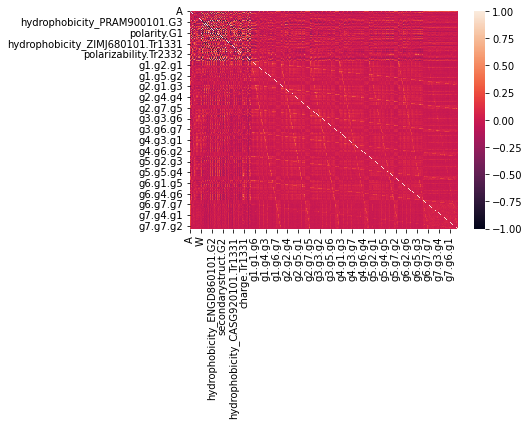

In [ ]:
new_dataset = pd.DataFrame(X, columns=data.columns[0:-1])
corr = new_dataset.corr()
print(corr.head())
sb.heatmap(corr)

In [ ]:
columns = np.full((len(new_dataset.columns),), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = new_dataset.columns[columns]
selected_columns.shape
print("Selected Columns :- \n\n",selected_columns)

new_dataset = new_dataset[selected_columns]
print("\n\nNew Data :- \n\n",new_dataset)


Selected Columns :- 

 Index(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
       ...
       'g7.g6.g5', 'g7.g6.g6', 'g7.g6.g7', 'g7.g7.g1', 'g7.g7.g2', 'g7.g7.g3',
       'g7.g7.g4', 'g7.g7.g5', 'g7.g7.g6', 'g7.g7.g7'],
      dtype='object', length=435)


New Data :- 

               A         C         D  ...  g7.g7.g5  g7.g7.g6  g7.g7.g7
0      0.189655  0.008621  0.025862  ...       0.0       0.0       0.0
1      0.110236  0.000000  0.047244  ...       0.0       0.0       0.0
2      0.103175  0.007937  0.079365  ...       0.0       0.0       0.0
3      0.117188  0.007812  0.046875  ...       0.0       0.0       0.0
4      0.105691  0.000000  0.089431  ...       0.0       0.0       0.0
...         ...       ...       ...  ...       ...       ...       ...
14318  0.015625  0.062500  0.062500  ...       0.0       0.0       0.0
14319  0.101124  0.000000  0.078652  ...       0.0       0.0       0.0
14320  0.041667  0.069444  0.055556  ...       0.0       0.0       0.0
14321  0.0359

In [ ]:
X=new_dataset.iloc[:,:].values

In [ ]:
scaler = StandardScaler()
trans = scaler.fit_transform(X)
trans = pd.DataFrame(trans)

In [ ]:
X = trans.iloc[:,:].values
print(X)

[[ 2.97765881 -0.31276737 -1.44450424 ... -0.06338291 -0.06013718
  -0.0204451 ]
 [ 0.84452589 -0.61904586 -0.47333349 ... -0.06338291 -0.06013718
  -0.0204451 ]
 [ 0.6548562  -0.33707519  0.98560037 ... -0.06338291 -0.06013718
  -0.0204451 ]
 ...
 [-0.99720041  1.84819756 -0.09582726 ... -0.06338291 -0.06013718
  -0.0204451 ]
 [-1.15017571  1.68134801 -0.33182225 ... -0.06338291 -0.06013718
  -0.0204451 ]
 [-0.9225914   4.11806151  0.91350519 ... -0.06338291 -0.06013718
  -0.0204451 ]]


In [ ]:



X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size = 0.30, random_state = 5)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
print("\nRecall:",recall_score(y_test, y_pred, average=None))
print("\n\nF1 score:",f1_score(y_test, y_pred, average=None))


Confusion matrix: 
 [[466  34 124 140   0   0  11]
 [ 34 537 100 185   0   2   7]
 [ 52  65 982 140   0   0   0]
 [162 192 319 344   0   0  16]
 [  5   4  70   2   2   0   0]
 [  8  10  15   8   0  42   0]
 [  6  11   1   6   0   0 195]]


Accuracy: 0.5976262508727019


Precision: [0.63574352 0.62954279 0.60955928 0.4169697  1.         0.95454545
 0.85152838]

Recall: [0.60129032 0.62080925 0.79257466 0.33301065 0.02409639 0.5060241
 0.89041096]


F1 score: [0.61803714 0.62514552 0.68912281 0.37029064 0.04705882 0.66141732
 0.87053571]


#Upto C class

[[0.18965517 0.00862069 0.02586207 ... 0.         0.         0.        ]
 [0.11023622 0.         0.04724409 ... 0.         0.         0.        ]
 [0.1031746  0.00793651 0.07936508 ... 0.         0.         0.        ]
 ...
 [0.07094595 0.         0.06756757 ... 0.         0.         0.        ]
 [0.10047847 0.00956938 0.07655502 ... 0.         0.         0.        ]
 [0.06049822 0.01779359 0.02135231 ... 0.         0.         0.        ]]
['a' 'a' 'a' ... 'c' 'c' 'c']
[0 0 0 ... 2 2 2]
Confusion matrix: 
 [[ 488   77  168]
 [  72  670  153]
 [  97  103 1051]]


Accuracy: 0.767280305661688


Precision: [0.74277017 0.78823529 0.76603499]

Recall: [0.66575716 0.74860335 0.8401279 ]


F1 score: [0.70215827 0.76790831 0.80137247]
          A         C         D  ...  g7.g7.g5  g7.g7.g6  g7.g7.g7
A  1.000000 -0.111596 -0.055297  ... -0.028647 -0.019520  0.004036
C -0.111596  1.000000 -0.040262  ...  0.110640  0.109267  0.014920
D -0.055297 -0.040262  1.000000  ...  0.006998  0.006340  0.001

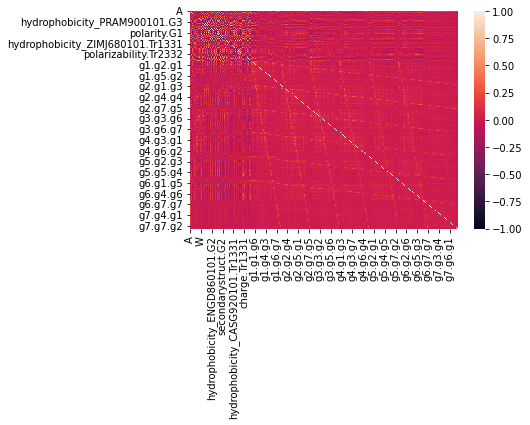

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_AAC.csv')
df1 = df1.drop(df1.columns[[0]],axis = 1)

df2 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_CTDC.csv')
df2 = df2.drop(df2.columns[[0]],axis = 1)

df3 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_CTDT.csv')
df3 = df3.drop(df3.columns[[0]],axis = 1)

df5 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_GAAC.csv')
df5 = df5.drop(df5.columns[[0]],axis = 1)

df4 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_CTriad.csv')
df4.tail()
df4[['d1','class']]=df4.iloc[:,0].str.split('|', n=1, expand=True)
df4 = df4.drop(df4.columns[[0]],axis = 1)
df4=df4.drop(['d1'], axis=1)
df4.tail()

data = pd.concat([df1, df2, df3,df5, df4], axis=1)
data.tail()

X= data.iloc[:9595,:-1].values
y= data.iloc[:9595,-1].values

print(X)
print(y)

le = LabelEncoder()
y= le.fit_transform(y) 
print(y)



X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size = 0.30, random_state = 5)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
print("\nRecall:",recall_score(y_test, y_pred, average=None))
print("\n\nF1 score:",f1_score(y_test, y_pred, average=None))

new_dataset = pd.DataFrame(X, columns=data.columns[0:-1])
corr = new_dataset.corr()
print(corr.head())
sb.heatmap(corr)

columns = np.full((len(new_dataset.columns),), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = new_dataset.columns[columns]
selected_columns.shape
print("Selected Columns :- \n\n",selected_columns)

new_dataset = new_dataset[selected_columns]
print("\n\nNew Data :- \n\n",new_dataset)

X=new_dataset.iloc[:,:].values
scaler = StandardScaler()
trans = scaler.fit_transform(X)
trans = pd.DataFrame(trans)

X = trans.iloc[:,:].values
print(X)



X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size = 0.30, random_state = 5)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
print("\nRecall:",recall_score(y_test, y_pred, average=None))
print("\n\nF1 score:",f1_score(y_test, y_pred, average=None))

#Dropping columns with 75% as 0 value

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_AAC.csv')
df1 = df1.drop(df1.columns[[0]],axis = 1)

df2 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_CTDC.csv')
df2 = df2.drop(df2.columns[[0]],axis = 1)

df3 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_CTDT.csv')
df3 = df3.drop(df3.columns[[0]],axis = 1)

df5 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_GAAC.csv')
df5 = df5.drop(df5.columns[[0]],axis = 1)

df4 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_CTriad.csv')
df4.tail()
df4[['d1','class']]=df4.iloc[:,0].str.split('|', n=1, expand=True)
df4 = df4.drop(df4.columns[[0]],axis = 1)
df4=df4.drop(['d1'], axis=1)
df4.tail()

data = pd.concat([df1, df2, df3,df5, df4], axis=1)
data.tail()

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y,hydrophobicity_PRAM900101.G1,hydrophobicity_PRAM900101.G2,hydrophobicity_PRAM900101.G3,hydrophobicity_ARGP820101.G1,hydrophobicity_ARGP820101.G2,hydrophobicity_ARGP820101.G3,hydrophobicity_ZIMJ680101.G1,hydrophobicity_ZIMJ680101.G2,hydrophobicity_ZIMJ680101.G3,hydrophobicity_PONP930101.G1,hydrophobicity_PONP930101.G2,hydrophobicity_PONP930101.G3,hydrophobicity_CASG920101.G1,hydrophobicity_CASG920101.G2,hydrophobicity_CASG920101.G3,hydrophobicity_ENGD860101.G1,hydrophobicity_ENGD860101.G2,hydrophobicity_ENGD860101.G3,hydrophobicity_FASG890101.G1,hydrophobicity_FASG890101.G2,...,g7.g2.g4,g7.g2.g5,g7.g2.g6,g7.g2.g7,g7.g3.g1,g7.g3.g2,g7.g3.g3,g7.g3.g4,g7.g3.g5,g7.g3.g6,g7.g3.g7,g7.g4.g1,g7.g4.g2,g7.g4.g3,g7.g4.g4,g7.g4.g5,g7.g4.g6,g7.g4.g7,g7.g5.g1,g7.g5.g2,g7.g5.g3,g7.g5.g4,g7.g5.g5,g7.g5.g6,g7.g5.g7,g7.g6.g1,g7.g6.g2,g7.g6.g3,g7.g6.g4,g7.g6.g5,g7.g6.g6,g7.g6.g7,g7.g7.g1,g7.g7.g2,g7.g7.g3,g7.g7.g4,g7.g7.g5,g7.g7.g6,g7.g7.g7,class
14318,0.015625,0.062500,0.062500,0.046875,0.015625,0.078125,0.015625,0.046875,0.109375,0.078125,0.000000,0.093750,0.062500,0.015625,0.046875,0.062500,0.046875,0.109375,0.015625,0.015625,0.375000,0.296875,0.328125,0.406250,0.359375,0.234375,0.484375,0.296875,0.218750,0.500000,0.156250,0.343750,0.625000,0.234375,0.140625,0.468750,0.218750,0.312500,0.343750,0.281250,...,0.00,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.333333,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.000000,0.333333,0.333333,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,g
14319,0.101124,0.000000,0.078652,0.044944,0.033708,0.022472,0.022472,0.089888,0.033708,0.089888,0.011236,0.078652,0.033708,0.056180,0.022472,0.112360,0.112360,0.056180,0.000000,0.000000,0.314607,0.404494,0.280899,0.505618,0.247191,0.247191,0.629213,0.123596,0.247191,0.550562,0.168539,0.280899,0.595506,0.280899,0.123596,0.370787,0.348315,0.280899,0.348315,0.247191,...,0.00,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,g
14320,0.041667,0.069444,0.055556,0.062500,0.027778,0.055556,0.020833,0.062500,0.090278,0.083333,0.020833,0.034722,0.041667,0.048611,0.090278,0.048611,0.069444,0.013889,0.013889,0.048611,0.381944,0.326389,0.291667,0.375000,0.347222,0.277778,0.520833,0.215278,0.263889,0.451389,0.208333,0.340278,0.597222,0.229167,0.173611,0.493056,0.229167,0.277778,0.395833,0.201389,...,0.25,0.250000,0.0,0.25,0.0,0.000000,0.0,0.25,0.0,0.0,0.0,0.25,0.0,0.000000,0.0,0.000000,0.0,0.00,0.25,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.25,0.00,0.0,0.0,0.0,0.0,g
14321,0.035971,0.064748,0.050360,0.064748,0.021583,0.028777,0.021583,0.100719,0.079137,0.100719,0.035971,0.086331,0.050360,0.043165,0.050360,0.057554,0.057554,0.035971,0.007194,0.007194,0.374101,0.258993,0.366906,0.388489,0.323741,0.287770,0.482014,0.237410,0.280576,0.489209,0.136691,0.374101,0.568345,0.237410,0.194245,0.453237,0.187050,0.359712,0.345324,0.223022,...,0.00,0.000000,0.0,0.00,0.0,0.500000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.25,0.00,0.25,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.25,0.000000,0.000000,0.0,0.0,0.00,0.25,0.0,0.0,0.0,0.0,g
14322,0.044444,0.133333,0.077778,0.044444,0.011111,0.100000,0.022222,0.077778,0.077778,0.044444,0.000000,0.022222,0.044444,0.033333,0.066667,0.044444,0.022222,0.077778,0.000000,0.055556,0.322222,0.333333,0.344444,0.344444,0.422222,0.233333,0.455556,0.311111,0.233333,0.366667,0.233333,0.400000,0.533333,0.244444,0.222222,0.444444,0.211111,0.344444,0.344444,0.188889,...,0.00,0.333333,0.0,0.00,0.0,0.333333,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.333333,0.0,0.000000,0.0,0.00,0.00,0.00,0.0,0.0,0.333333,0.333333,0.000000,0.333333,0.0,0.333333,0.00,0.333333,0.333333,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,g


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14323 entries, 0 to 14322
Columns: 447 entries, A to class
dtypes: float64(446), object(1)
memory usage: 48.8+ MB


In [ ]:
data.describe()

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y,hydrophobicity_PRAM900101.G1,hydrophobicity_PRAM900101.G2,hydrophobicity_PRAM900101.G3,hydrophobicity_ARGP820101.G1,hydrophobicity_ARGP820101.G2,hydrophobicity_ARGP820101.G3,hydrophobicity_ZIMJ680101.G1,hydrophobicity_ZIMJ680101.G2,hydrophobicity_ZIMJ680101.G3,hydrophobicity_PONP930101.G1,hydrophobicity_PONP930101.G2,hydrophobicity_PONP930101.G3,hydrophobicity_CASG920101.G1,hydrophobicity_CASG920101.G2,hydrophobicity_CASG920101.G3,hydrophobicity_ENGD860101.G1,hydrophobicity_ENGD860101.G2,hydrophobicity_ENGD860101.G3,hydrophobicity_FASG890101.G1,hydrophobicity_FASG890101.G2,...,g7.g2.g3,g7.g2.g4,g7.g2.g5,g7.g2.g6,g7.g2.g7,g7.g3.g1,g7.g3.g2,g7.g3.g3,g7.g3.g4,g7.g3.g5,g7.g3.g6,g7.g3.g7,g7.g4.g1,g7.g4.g2,g7.g4.g3,g7.g4.g4,g7.g4.g5,g7.g4.g6,g7.g4.g7,g7.g5.g1,g7.g5.g2,g7.g5.g3,g7.g5.g4,g7.g5.g5,g7.g5.g6,g7.g5.g7,g7.g6.g1,g7.g6.g2,g7.g6.g3,g7.g6.g4,g7.g6.g5,g7.g6.g6,g7.g6.g7,g7.g7.g1,g7.g7.g2,g7.g7.g3,g7.g7.g4,g7.g7.g5,g7.g7.g6,g7.g7.g7
count,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,1.432300e+04,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,1.432300e+04,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,...,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000
mean,0.078794,0.017424,0.057665,0.071356,0.039201,0.070733,0.022840,0.058189,0.062033,0.092861,0.021590,0.041031,0.044615,0.037718,0.052831,0.059370,0.053394,0.072098,0.012941,0.033314,0.322636,0.363061,0.314303,0.391270,0.327609,0.281121,0.535835,0.195985,2.681802e-01,0.427184,0.225198,0.347617,0.550749,0.321497,1.277548e-01,0.423405,0.275233,0.301362,0.340974,0.209774,...,0.021896,0.015112,0.014332,0.015963,0.003241,0.021190,0.019453,0.017104,0.011199,0.011082,0.010667,0.002787,0.014291,0.014615,0.011312,0.008947,0.007827,0.008484,0.002326,0.012823,0.013493,0.010761,0.008277,0.008678,0.008280,0.002508,0.012874,0.015833,0.010934,0.007294,0.008265,0.008270,0.001720,0.002298,0.002731,0.002871,0.001429,0.001894,0.001703,0.000171
std,0.037232,0.028148,0.022018,0.029096,0.019295,0.028250,0.015866,0.026529,0.032855,0.032884,0.014279,0.022681,0.021695,0.021789,0.026577,0.025770,0.023556,0.027293,0.012033,0.018519,0.056070,0.062698,0.040729,0.047881,0.054207,0.046775,0.053458,0.048614,4.618810e-02,0.056659,0.059109,0.040929,0.045562,0.056448,3.852849e-02,0.056403,0.059653,0.042784,0.053745,0.047749,...,0.082401,0.068554,0.067495,0.069388,0.037331,0.080733,0.077679,0.074345,0.060362,0.064120,0.057827,0.034564,0.067382,0.068090,0.059246,0.055859,0.051573,0.052505,0.031975,0.065974,0.066363,0.061010,0.054771,0.056489,0.052438,0.036669,0.060665,0.069272,0.061019,0.050043,0.052398,0.051748,0.027332,0.029983,0.032496,0.033960,0.020561,0.029891,0.028323,0.008348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.111111,0.107143,0.103448,0.117021,0.000000,0.225806,0.000000,-5.551115e-17,0.093750,0.029412,0.120000,0.172414,0.000000,-5.551115e-17,0.068966,0.037037,0.035714,0.034483,0.038462,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
index=data.describe().values[6,:]
print(index)

[0.10069528 0.02013423 0.07058824 0.08767408 0.05084746 0.08786611
 0.03125    0.07392996 0.08139535 0.11214953 0.0297619  0.05376344
 0.05698744 0.04918033 0.06814109 0.07368421 0.06598985 0.08847383
 0.01900689 0.04411765 0.35555556 0.40396695 0.33776306 0.41843972
 0.35928144 0.31067961 0.57009346 0.22089456 0.29752066 0.46206897
 0.26229508 0.37142857 0.57727696 0.35609032 0.14828897 0.45765971
 0.31317704 0.32705585 0.37234043 0.23726269 0.47630195 0.42307692
 0.40963855 0.27586207 0.37142857 0.34817814 0.37837838 0.35779817
 0.46766169 0.27586207 0.13333333 0.79057592 0.14814815 0.48275862
 0.31524416 0.30188679 0.47510445 0.35555556 0.2629295  0.25126917
 0.24229922 0.26174497 0.28032493 0.25987981 0.20689655 0.23655914
 0.33015114 0.12337662 0.2173913  0.34615385 0.18780534 0.39432177
 0.1741573  0.09333333 0.25555556 0.2972028  0.19579683 0.15957447
 0.34655253 0.22024563 0.31578947 0.20987654 0.21428571 0.24826381
 0.28395062 0.23014213 0.31122449 0.17868877 0.24475524 0.1981

In [ ]:
i=int(0)
l = []
for value in index:
  if value == 0:
    l.append(int(i))
  i=i+1

data.tail()

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y,hydrophobicity_PRAM900101.G1,hydrophobicity_PRAM900101.G2,hydrophobicity_PRAM900101.G3,hydrophobicity_ARGP820101.G1,hydrophobicity_ARGP820101.G2,hydrophobicity_ARGP820101.G3,hydrophobicity_ZIMJ680101.G1,hydrophobicity_ZIMJ680101.G2,hydrophobicity_ZIMJ680101.G3,hydrophobicity_PONP930101.G1,hydrophobicity_PONP930101.G2,hydrophobicity_PONP930101.G3,hydrophobicity_CASG920101.G1,hydrophobicity_CASG920101.G2,hydrophobicity_CASG920101.G3,hydrophobicity_ENGD860101.G1,hydrophobicity_ENGD860101.G2,hydrophobicity_ENGD860101.G3,hydrophobicity_FASG890101.G1,hydrophobicity_FASG890101.G2,...,g7.g2.g4,g7.g2.g5,g7.g2.g6,g7.g2.g7,g7.g3.g1,g7.g3.g2,g7.g3.g3,g7.g3.g4,g7.g3.g5,g7.g3.g6,g7.g3.g7,g7.g4.g1,g7.g4.g2,g7.g4.g3,g7.g4.g4,g7.g4.g5,g7.g4.g6,g7.g4.g7,g7.g5.g1,g7.g5.g2,g7.g5.g3,g7.g5.g4,g7.g5.g5,g7.g5.g6,g7.g5.g7,g7.g6.g1,g7.g6.g2,g7.g6.g3,g7.g6.g4,g7.g6.g5,g7.g6.g6,g7.g6.g7,g7.g7.g1,g7.g7.g2,g7.g7.g3,g7.g7.g4,g7.g7.g5,g7.g7.g6,g7.g7.g7,class
14318,0.015625,0.062500,0.062500,0.046875,0.015625,0.078125,0.015625,0.046875,0.109375,0.078125,0.000000,0.093750,0.062500,0.015625,0.046875,0.062500,0.046875,0.109375,0.015625,0.015625,0.375000,0.296875,0.328125,0.406250,0.359375,0.234375,0.484375,0.296875,0.218750,0.500000,0.156250,0.343750,0.625000,0.234375,0.140625,0.468750,0.218750,0.312500,0.343750,0.281250,...,0.00,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.333333,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.000000,0.333333,0.333333,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,g
14319,0.101124,0.000000,0.078652,0.044944,0.033708,0.022472,0.022472,0.089888,0.033708,0.089888,0.011236,0.078652,0.033708,0.056180,0.022472,0.112360,0.112360,0.056180,0.000000,0.000000,0.314607,0.404494,0.280899,0.505618,0.247191,0.247191,0.629213,0.123596,0.247191,0.550562,0.168539,0.280899,0.595506,0.280899,0.123596,0.370787,0.348315,0.280899,0.348315,0.247191,...,0.00,0.000000,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,g
14320,0.041667,0.069444,0.055556,0.062500,0.027778,0.055556,0.020833,0.062500,0.090278,0.083333,0.020833,0.034722,0.041667,0.048611,0.090278,0.048611,0.069444,0.013889,0.013889,0.048611,0.381944,0.326389,0.291667,0.375000,0.347222,0.277778,0.520833,0.215278,0.263889,0.451389,0.208333,0.340278,0.597222,0.229167,0.173611,0.493056,0.229167,0.277778,0.395833,0.201389,...,0.25,0.250000,0.0,0.25,0.0,0.000000,0.0,0.25,0.0,0.0,0.0,0.25,0.0,0.000000,0.0,0.000000,0.0,0.00,0.25,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.25,0.00,0.0,0.0,0.0,0.0,g
14321,0.035971,0.064748,0.050360,0.064748,0.021583,0.028777,0.021583,0.100719,0.079137,0.100719,0.035971,0.086331,0.050360,0.043165,0.050360,0.057554,0.057554,0.035971,0.007194,0.007194,0.374101,0.258993,0.366906,0.388489,0.323741,0.287770,0.482014,0.237410,0.280576,0.489209,0.136691,0.374101,0.568345,0.237410,0.194245,0.453237,0.187050,0.359712,0.345324,0.223022,...,0.00,0.000000,0.0,0.00,0.0,0.500000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.25,0.00,0.25,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.25,0.000000,0.000000,0.0,0.0,0.00,0.25,0.0,0.0,0.0,0.0,g
14322,0.044444,0.133333,0.077778,0.044444,0.011111,0.100000,0.022222,0.077778,0.077778,0.044444,0.000000,0.022222,0.044444,0.033333,0.066667,0.044444,0.022222,0.077778,0.000000,0.055556,0.322222,0.333333,0.344444,0.344444,0.422222,0.233333,0.455556,0.311111,0.233333,0.366667,0.233333,0.400000,0.533333,0.244444,0.222222,0.444444,0.211111,0.344444,0.344444,0.188889,...,0.00,0.333333,0.0,0.00,0.0,0.333333,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.333333,0.0,0.000000,0.0,0.00,0.00,0.00,0.0,0.0,0.333333,0.333333,0.000000,0.333333,0.0,0.333333,0.00,0.333333,0.333333,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,g


In [ ]:
print(l)

[109, 116, 123, 130, 137, 144, 145, 146, 147, 148, 149, 150, 151, 158, 165, 172, 179, 186, 193, 194, 195, 196, 197, 198, 199, 200, 207, 214, 221, 228, 235, 242, 243, 244, 245, 246, 247, 248, 249, 256, 263, 270, 274, 275, 276, 277, 281, 282, 283, 284, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 305, 312, 319, 323, 324, 325, 326, 330, 331, 332, 333, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 354, 361, 368, 372, 373, 374, 375, 379, 380, 381, 382, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445]


In [ ]:
data = data.drop(data.columns[l],axis = 1)
data.tail()

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y,hydrophobicity_PRAM900101.G1,hydrophobicity_PRAM900101.G2,hydrophobicity_PRAM900101.G3,hydrophobicity_ARGP820101.G1,hydrophobicity_ARGP820101.G2,hydrophobicity_ARGP820101.G3,hydrophobicity_ZIMJ680101.G1,hydrophobicity_ZIMJ680101.G2,hydrophobicity_ZIMJ680101.G3,hydrophobicity_PONP930101.G1,hydrophobicity_PONP930101.G2,hydrophobicity_PONP930101.G3,hydrophobicity_CASG920101.G1,hydrophobicity_CASG920101.G2,hydrophobicity_CASG920101.G3,hydrophobicity_ENGD860101.G1,hydrophobicity_ENGD860101.G2,hydrophobicity_ENGD860101.G3,hydrophobicity_FASG890101.G1,hydrophobicity_FASG890101.G2,...,g5.g3.g4,g5.g3.g5,g5.g3.g6,g5.g4.g1,g5.g4.g2,g5.g4.g3,g5.g5.g1,g5.g5.g2,g5.g5.g3,g5.g6.g1,g5.g6.g2,g5.g6.g3,g6.g1.g1,g6.g1.g2,g6.g1.g3,g6.g1.g4,g6.g1.g5,g6.g1.g6,g6.g2.g1,g6.g2.g2,g6.g2.g3,g6.g2.g4,g6.g2.g5,g6.g2.g6,g6.g3.g1,g6.g3.g2,g6.g3.g3,g6.g3.g4,g6.g3.g5,g6.g3.g6,g6.g4.g1,g6.g4.g2,g6.g4.g3,g6.g5.g1,g6.g5.g2,g6.g5.g3,g6.g6.g1,g6.g6.g2,g6.g6.g3,class
14318,0.015625,0.062500,0.062500,0.046875,0.015625,0.078125,0.015625,0.046875,0.109375,0.078125,0.000000,0.093750,0.062500,0.015625,0.046875,0.062500,0.046875,0.109375,0.015625,0.015625,0.375000,0.296875,0.328125,0.406250,0.359375,0.234375,0.484375,0.296875,0.218750,0.500000,0.156250,0.343750,0.625000,0.234375,0.140625,0.468750,0.218750,0.312500,0.343750,0.281250,...,0.00,0.0,0.00,0.000000,0.333333,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.333333,0.00,0.000000,0.000000,0.0,0.000000,0.333333,0.00,0.333333,0.00,0.333333,0.000000,0.000000,0.000000,0.00,0.0,0.333333,0.000000,0.00,0.333333,0.00,0.00,0.000000,0.00,0.0,g
14319,0.101124,0.000000,0.078652,0.044944,0.033708,0.022472,0.022472,0.089888,0.033708,0.089888,0.011236,0.078652,0.033708,0.056180,0.022472,0.112360,0.112360,0.056180,0.000000,0.000000,0.314607,0.404494,0.280899,0.505618,0.247191,0.247191,0.629213,0.123596,0.247191,0.550562,0.168539,0.280899,0.595506,0.280899,0.123596,0.370787,0.348315,0.280899,0.348315,0.247191,...,0.00,0.0,0.00,0.000000,0.000000,0.0,0.0,0.333333,0.00,0.000000,0.333333,0.0,0.333333,0.333333,0.000000,0.00,0.000000,0.333333,0.0,0.000000,0.000000,0.00,0.333333,0.00,0.000000,0.333333,0.333333,0.333333,0.00,0.0,0.000000,0.333333,0.00,0.000000,0.00,0.00,0.333333,0.00,0.0,g
14320,0.041667,0.069444,0.055556,0.062500,0.027778,0.055556,0.020833,0.062500,0.090278,0.083333,0.020833,0.034722,0.041667,0.048611,0.090278,0.048611,0.069444,0.013889,0.013889,0.048611,0.381944,0.326389,0.291667,0.375000,0.347222,0.277778,0.520833,0.215278,0.263889,0.451389,0.208333,0.340278,0.597222,0.229167,0.173611,0.493056,0.229167,0.277778,0.395833,0.201389,...,0.00,1.0,0.25,0.000000,0.250000,0.0,0.0,0.500000,0.00,0.250000,0.000000,0.0,0.000000,0.500000,0.000000,0.25,0.000000,0.000000,0.0,0.000000,0.750000,0.25,0.000000,0.25,0.000000,0.250000,0.000000,0.000000,0.25,0.0,0.000000,0.000000,0.25,0.000000,0.25,0.25,0.000000,0.25,0.0,g
14321,0.035971,0.064748,0.050360,0.064748,0.021583,0.028777,0.021583,0.100719,0.079137,0.100719,0.035971,0.086331,0.050360,0.043165,0.050360,0.057554,0.057554,0.035971,0.007194,0.007194,0.374101,0.258993,0.366906,0.388489,0.323741,0.287770,0.482014,0.237410,0.280576,0.489209,0.136691,0.374101,0.568345,0.237410,0.194245,0.453237,0.187050,0.359712,0.345324,0.223022,...,0.25,0.0,0.00,0.250000,0.500000,0.0,0.0,0.250000,0.25,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.25,0.250000,0.250000,0.0,0.250000,0.250000,0.00,0.000000,0.00,0.000000,0.000000,0.250000,0.000000,0.25,0.0,0.250000,0.500000,0.00,0.000000,0.25,0.00,0.500000,0.00,0.0,g
14322,0.044444,0.133333,0.077778,0.044444,0.011111,0.100000,0.022222,0.077778,0.077778,0.044444,0.000000,0.022222,0.044444,0.033333,0.066667,0.044444,0.022222,0.077778,0.000000,0.055556,0.322222,0.333333,0.344444,0.344444,0.422222,0.233333,0.455556,0.311111,0.233333,0.366667,0.233333,0.400000,0.533333,0.244444,0.222222,0.444444,0.211111,0.344444,0.344444,0.188889,...,0.00,0.0,0.00,0.333333,0.000000,0.0,0.0,0.000000,0.00,0.333333,0.000000,

[[0.18965517 0.00862069 0.02586207 ... 0.         0.         0.        ]
 [0.11023622 0.         0.04724409 ... 0.         0.16666667 0.        ]
 [0.1031746  0.00793651 0.07936508 ... 0.2        0.2        0.        ]
 ...
 [0.04166667 0.06944444 0.05555556 ... 0.         0.25       0.        ]
 [0.03597122 0.0647482  0.05035971 ... 0.5        0.         0.        ]
 [0.04444444 0.13333333 0.07777778 ... 0.         0.         0.        ]]
['a' 'a' 'a' ... 'g' 'g' 'g']
[0 0 0 ... 6 6 6]
Confusion matrix: 
 [[452  32 125 154   0   0  12]
 [ 28 552  97 182   0   1   5]
 [ 52  65 986 136   0   0   0]
 [168 180 318 349   0   0  18]
 [  5   4  70   2   2   0   0]
 [  8  10  16   5   0  44   0]
 [  7   9   1   7   0   0 195]]


Accuracy: 0.6004188969048173


Precision: [0.62777778 0.64788732 0.61128332 0.41796407 1.         0.97777778
 0.84782609]

Recall: [0.58322581 0.63815029 0.79580307 0.33785092 0.02409639 0.53012048
 0.89041096]


F1 score: [0.60468227 0.64298195 0.6914446  0.37366167 

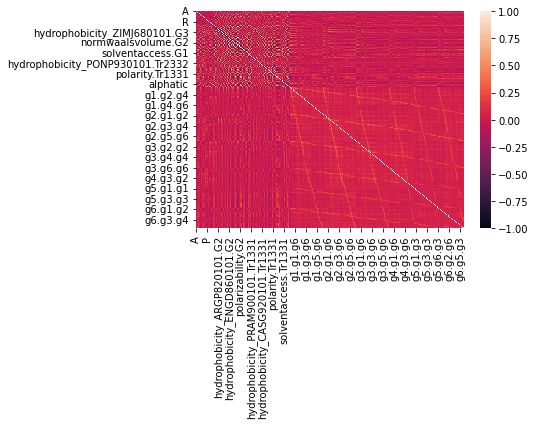

In [ ]:

X= data.iloc[:,:-1].values
y= data.iloc[:,-1].values

print(X)
print(y)

le = LabelEncoder()
y= le.fit_transform(y) 
print(y)



X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size = 0.30, random_state = 5)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
print("\nRecall:",recall_score(y_test, y_pred, average=None))
print("\n\nF1 score:",f1_score(y_test, y_pred, average=None))

new_dataset = pd.DataFrame(X, columns=data.columns[0:-1])
corr = new_dataset.corr()
print(corr.head())
sb.heatmap(corr)

columns = np.full((len(new_dataset.columns),), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = new_dataset.columns[columns]
selected_columns.shape
print("Selected Columns :- \n\n",selected_columns)

new_dataset = new_dataset[selected_columns]
print("\n\nNew Data :- \n\n",new_dataset)

X=new_dataset.iloc[:,:].values
scaler = StandardScaler()
trans = scaler.fit_transform(X)
trans = pd.DataFrame(trans)

X = trans.iloc[:,:].values
print(X)



X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size = 0.30, random_state = 5)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
print("\nRecall:",recall_score(y_test, y_pred, average=None))
print("\n\nF1 score:",f1_score(y_test, y_pred, average=None))

#Upto C and dropping data

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_AAC.csv')
df1 = df1.drop(df1.columns[[0]],axis = 1)

df2 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_CTDC.csv')
df2 = df2.drop(df2.columns[[0]],axis = 1)

df3 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_CTDT.csv')
df3 = df3.drop(df3.columns[[0]],axis = 1)

df5 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_GAAC.csv')
df5 = df5.drop(df5.columns[[0]],axis = 1)

df4 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_CTriad.csv')
df4.tail()
df4[['d1','class']]=df4.iloc[:,0].str.split('|', n=1, expand=True)
df4 = df4.drop(df4.columns[[0]],axis = 1)
df4=df4.drop(['d1'], axis=1)
df4.tail()

data = pd.concat([df1, df2, df3,df5, df4], axis=1)
data = data.drop(data.columns[l],axis = 1)
data.tail()

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y,hydrophobicity_PRAM900101.G1,hydrophobicity_PRAM900101.G2,hydrophobicity_PRAM900101.G3,hydrophobicity_ARGP820101.G1,hydrophobicity_ARGP820101.G2,hydrophobicity_ARGP820101.G3,hydrophobicity_ZIMJ680101.G1,hydrophobicity_ZIMJ680101.G2,hydrophobicity_ZIMJ680101.G3,hydrophobicity_PONP930101.G1,hydrophobicity_PONP930101.G2,hydrophobicity_PONP930101.G3,hydrophobicity_CASG920101.G1,hydrophobicity_CASG920101.G2,hydrophobicity_CASG920101.G3,hydrophobicity_ENGD860101.G1,hydrophobicity_ENGD860101.G2,hydrophobicity_ENGD860101.G3,hydrophobicity_FASG890101.G1,hydrophobicity_FASG890101.G2,...,g5.g3.g4,g5.g3.g5,g5.g3.g6,g5.g4.g1,g5.g4.g2,g5.g4.g3,g5.g5.g1,g5.g5.g2,g5.g5.g3,g5.g6.g1,g5.g6.g2,g5.g6.g3,g6.g1.g1,g6.g1.g2,g6.g1.g3,g6.g1.g4,g6.g1.g5,g6.g1.g6,g6.g2.g1,g6.g2.g2,g6.g2.g3,g6.g2.g4,g6.g2.g5,g6.g2.g6,g6.g3.g1,g6.g3.g2,g6.g3.g3,g6.g3.g4,g6.g3.g5,g6.g3.g6,g6.g4.g1,g6.g4.g2,g6.g4.g3,g6.g5.g1,g6.g5.g2,g6.g5.g3,g6.g6.g1,g6.g6.g2,g6.g6.g3,class
14318,0.015625,0.062500,0.062500,0.046875,0.015625,0.078125,0.015625,0.046875,0.109375,0.078125,0.000000,0.093750,0.062500,0.015625,0.046875,0.062500,0.046875,0.109375,0.015625,0.015625,0.375000,0.296875,0.328125,0.406250,0.359375,0.234375,0.484375,0.296875,0.218750,0.500000,0.156250,0.343750,0.625000,0.234375,0.140625,0.468750,0.218750,0.312500,0.343750,0.281250,...,0.00,0.0,0.00,0.000000,0.333333,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.333333,0.00,0.000000,0.000000,0.0,0.000000,0.333333,0.00,0.333333,0.00,0.333333,0.000000,0.000000,0.000000,0.00,0.0,0.333333,0.000000,0.00,0.333333,0.00,0.00,0.000000,0.00,0.0,g
14319,0.101124,0.000000,0.078652,0.044944,0.033708,0.022472,0.022472,0.089888,0.033708,0.089888,0.011236,0.078652,0.033708,0.056180,0.022472,0.112360,0.112360,0.056180,0.000000,0.000000,0.314607,0.404494,0.280899,0.505618,0.247191,0.247191,0.629213,0.123596,0.247191,0.550562,0.168539,0.280899,0.595506,0.280899,0.123596,0.370787,0.348315,0.280899,0.348315,0.247191,...,0.00,0.0,0.00,0.000000,0.000000,0.0,0.0,0.333333,0.00,0.000000,0.333333,0.0,0.333333,0.333333,0.000000,0.00,0.000000,0.333333,0.0,0.000000,0.000000,0.00,0.333333,0.00,0.000000,0.333333,0.333333,0.333333,0.00,0.0,0.000000,0.333333,0.00,0.000000,0.00,0.00,0.333333,0.00,0.0,g
14320,0.041667,0.069444,0.055556,0.062500,0.027778,0.055556,0.020833,0.062500,0.090278,0.083333,0.020833,0.034722,0.041667,0.048611,0.090278,0.048611,0.069444,0.013889,0.013889,0.048611,0.381944,0.326389,0.291667,0.375000,0.347222,0.277778,0.520833,0.215278,0.263889,0.451389,0.208333,0.340278,0.597222,0.229167,0.173611,0.493056,0.229167,0.277778,0.395833,0.201389,...,0.00,1.0,0.25,0.000000,0.250000,0.0,0.0,0.500000,0.00,0.250000,0.000000,0.0,0.000000,0.500000,0.000000,0.25,0.000000,0.000000,0.0,0.000000,0.750000,0.25,0.000000,0.25,0.000000,0.250000,0.000000,0.000000,0.25,0.0,0.000000,0.000000,0.25,0.000000,0.25,0.25,0.000000,0.25,0.0,g
14321,0.035971,0.064748,0.050360,0.064748,0.021583,0.028777,0.021583,0.100719,0.079137,0.100719,0.035971,0.086331,0.050360,0.043165,0.050360,0.057554,0.057554,0.035971,0.007194,0.007194,0.374101,0.258993,0.366906,0.388489,0.323741,0.287770,0.482014,0.237410,0.280576,0.489209,0.136691,0.374101,0.568345,0.237410,0.194245,0.453237,0.187050,0.359712,0.345324,0.223022,...,0.25,0.0,0.00,0.250000,0.500000,0.0,0.0,0.250000,0.25,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.25,0.250000,0.250000,0.0,0.250000,0.250000,0.00,0.000000,0.00,0.000000,0.000000,0.250000,0.000000,0.25,0.0,0.250000,0.500000,0.00,0.000000,0.25,0.00,0.500000,0.00,0.0,g
14322,0.044444,0.133333,0.077778,0.044444,0.011111,0.100000,0.022222,0.077778,0.077778,0.044444,0.000000,0.022222,0.044444,0.033333,0.066667,0.044444,0.022222,0.077778,0.000000,0.055556,0.322222,0.333333,0.344444,0.344444,0.422222,0.233333,0.455556,0.311111,0.233333,0.366667,0.233333,0.400000,0.533333,0.244444,0.222222,0.444444,0.211111,0.344444,0.344444,0.188889,...,0.00,0.0,0.00,0.333333,0.000000,0.0,0.0,0.000000,0.00,0.333333,0.000000,

[[0.18965517 0.00862069 0.02586207 ... 0.         0.         0.        ]
 [0.11023622 0.         0.04724409 ... 0.         0.16666667 0.        ]
 [0.1031746  0.00793651 0.07936508 ... 0.2        0.2        0.        ]
 ...
 [0.07094595 0.         0.06756757 ... 0.         0.         0.        ]
 [0.10047847 0.00956938 0.07655502 ... 0.         0.         0.2       ]
 [0.06049822 0.01779359 0.02135231 ... 0.14285714 0.57142857 0.14285714]]
['a' 'a' 'a' ... 'c' 'c' 'c']
[0 0 0 ... 2 2 2]
Confusion matrix: 
 [[ 490   72  171]
 [  69  664  162]
 [  98  101 1052]]


Accuracy: 0.7662382771795763


Precision: [0.74581431 0.79330944 0.75956679]

Recall: [0.66848568 0.74189944 0.84092726]


F1 score: [0.70503597 0.76674365 0.79817906]
          A         C         D  ...  g6.g6.g1  g6.g6.g2  g6.g6.g3
A  1.000000 -0.111596 -0.055297  ...  0.024049 -0.121004 -0.124880
C -0.111596  1.000000 -0.040262  ... -0.042660 -0.044423  0.004372
D -0.055297 -0.040262  1.000000  ...  0.145576  0.172369  0.14

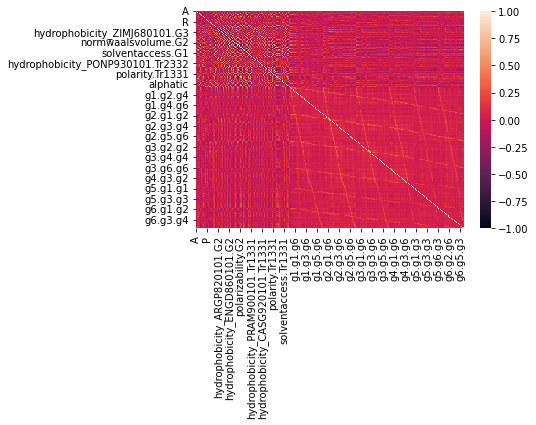

In [ ]:

X= data.iloc[:9595,:-1].values
y= data.iloc[:9595,-1].values

print(X)
print(y)

le = LabelEncoder()
y= le.fit_transform(y) 
print(y)



X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size = 0.30, random_state = 5)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
print("\nRecall:",recall_score(y_test, y_pred, average=None))
print("\n\nF1 score:",f1_score(y_test, y_pred, average=None))

new_dataset = pd.DataFrame(X, columns=data.columns[0:-1])
corr = new_dataset.corr()
print(corr.head())
sb.heatmap(corr)

columns = np.full((len(new_dataset.columns),), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = new_dataset.columns[columns]
selected_columns.shape
print("Selected Columns :- \n\n",selected_columns)

new_dataset = new_dataset[selected_columns]
print("\n\nNew Data :- \n\n",new_dataset)

X=new_dataset.iloc[:,:].values
scaler = StandardScaler()
trans = scaler.fit_transform(X)
trans = pd.DataFrame(trans)

X = trans.iloc[:,:].values
print(X)



X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size = 0.30, random_state = 5)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
print("\nRecall:",recall_score(y_test, y_pred, average=None))
print("\n\nF1 score:",f1_score(y_test, y_pred, average=None))